In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import ImageQuant2, direcslist, load_image, raw_data_path

%matplotlib widget

### Data paths

In [2]:
basepath = raw_data_path + "/Imaging/mlc4"
paths = direcslist(basepath, 1)
print(len(paths))

17


### Extract data from paths

In [3]:
dates = []
lines = []
embryo_ids = []
for p in paths:
    code = p.strip("/").split("/")[-2]
    dates.append(code.split("_")[0])
    lines.append(code.split("_")[1])
    # embryo_id = int(os.path.getmtime(glob.glob(p + '/*488 SP 535-50*')[0]))
    # np.savetxt(p + '/EmbryoID.txt', [embryo_id], fmt='%i')
    embryo_ids.append(str(np.loadtxt(p + "/EmbryoID.txt").astype(int)))
print(len(set(embryo_ids)))
df = pd.DataFrame({"Path": paths, "EmbryoID": embryo_ids, "Line": lines, "Date": dates})
df = df[df.Line.isin(["lp637", "nwg240", "nwg338", "nwg376"])]
df["Path"] = df["Path"].apply(lambda x: x[len(raw_data_path) :])
df.to_csv("../../data/mlc4_embryos.csv")
df

17


Path    EmbryoID    Line  \
0   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651686192  nwg376   
1   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651689529  nwg376   
2   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651690158  nwg376   
3   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651691673  nwg376   
4   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651692142  nwg376   
5   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651762677   lp637   
6   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651764081   lp637   
7   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651763515   lp637   
8   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651765815   lp637   
9   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651765978   lp637   
10  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651766092   lp637   
11  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651768045   lp637   
12  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651768497   lp637   
13  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651758810  nwg376   
14  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651759099  nwg376   
15  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651761419  nwg376   
16  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651761965  nwg376   

      Date  
0   220504  
1   220504  
2   220504  
3   220504  
4   220504  
5   220505  
6   220505  
7   220505  
8   220505  
9   220505  
10  220505  
11  220505  
12  220505  
13  220505  
14  220505  
15  220505  
16  220505

### Segment

In [4]:
# results = []
# for index, row in df.iterrows():
#     print(row.Path)

#     # Import movie
#     img = load_image(row.Path + '/af_corrected.tif')
#     roi = np.loadtxt(row.Path + '/ROI_fit_anaphase.txt')

#     # Run quantification
#     iq = ImageQuant2(img=img, roi=roi)
#     iq.segment()

#     # Save ROIs
#     for i, r in enumerate(iq.roi):
#         np.savetxt(row.Path + '/ROI_fit_%s.txt' % i, r)

### Import quantification model

In [5]:
membg = np.loadtxt("../../data/calibration_mem6.txt")
cytbg = np.loadtxt("../../data/calibration_cyt.txt")
calibration_factor = np.loadtxt("../../data/calibration_constants.txt")[6]
print(calibration_factor)

3.105838399548696


### Loop through embryos and quantify

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:31,  1.75it/s]

  1%|█▎                                                                                                                                              | 9/1000 [00:00<00:57, 17.26it/s]

  2%|██▌                                                                                                                                            | 18/1000 [00:00<00:30, 32.65it/s]

  3%|███▊                                                                                                                                           | 27/1000 [00:00<00:21, 45.33it/s]

  4%|█████▏                                                                                                                                         | 36/1000 [00:01<00:17, 55.19it/s]

  4%|██████▍                                                                                                                                        | 45/1000 [00:01<00:15, 62.56it/s]

  5%|███████▌                                                                                                                                       | 53/1000 [00:01<00:14, 66.83it/s]

  6%|████████▋                                                                                                                                      | 61/1000 [00:01<00:13, 69.48it/s]

  7%|██████████                                                                                                                                     | 70/1000 [00:01<00:12, 72.93it/s]

  8%|███████████▏                                                                                                                                   | 78/1000 [00:01<00:12, 72.36it/s]

  9%|████████████▎                                                                                                                                  | 86/1000 [00:01<00:12, 70.33it/s]

  9%|█████████████▍                                                                                                                                 | 94/1000 [00:01<00:12, 70.48it/s]

 10%|██████████████▍                                                                                                                               | 102/1000 [00:01<00:12, 71.90it/s]

 11%|███████████████▊                                                                                                                              | 111/1000 [00:01<00:11, 75.34it/s]

 12%|█████████████████                                                                                                                             | 120/1000 [00:02<00:11, 77.69it/s]

 13%|██████████████████▎                                                                                                                           | 129/1000 [00:02<00:10, 79.51it/s]

 14%|███████████████████▌                                                                                                                          | 138/1000 [00:02<00:10, 80.44it/s]

 15%|████████████████████▊                                                                                                                         | 147/1000 [00:02<00:10, 81.39it/s]

 16%|██████████████████████▏                                                                                                                       | 156/1000 [00:02<00:10, 81.85it/s]

 16%|███████████████████████▍                                                                                                                      | 165/1000 [00:02<00:10, 82.64it/s]

 17%|████████████████████████▋                                                                                                                     | 174/1000 [00:02<00:09, 83.01it/s]

 18%|█████████████████████████▉                                                                                                                    | 183/1000 [00:02<00:09, 83.00it/s]

 19%|███████████████████████████▎                                                                                                                  | 192/1000 [00:02<00:09, 82.91it/s]

 20%|████████████████████████████▌                                                                                                                 | 201/1000 [00:03<00:09, 83.14it/s]

 21%|█████████████████████████████▊                                                                                                                | 210/1000 [00:03<00:09, 83.34it/s]

 22%|███████████████████████████████                                                                                                               | 219/1000 [00:03<00:09, 83.00it/s]

 23%|████████████████████████████████▍                                                                                                             | 228/1000 [00:03<00:09, 83.10it/s]

 24%|█████████████████████████████████▋                                                                                                            | 237/1000 [00:03<00:09, 83.07it/s]

 25%|██████████████████████████████████▉                                                                                                           | 246/1000 [00:03<00:09, 83.16it/s]

 26%|████████████████████████████████████▏                                                                                                         | 255/1000 [00:03<00:08, 83.10it/s]

 26%|█████████████████████████████████████▍                                                                                                        | 264/1000 [00:03<00:08, 83.09it/s]

 27%|██████████████████████████████████████▊                                                                                                       | 273/1000 [00:03<00:09, 76.98it/s]

 28%|███████████████████████████████████████▉                                                                                                      | 281/1000 [00:04<00:09, 74.94it/s]

 29%|█████████████████████████████████████████                                                                                                     | 289/1000 [00:04<00:09, 75.32it/s]

 30%|██████████████████████████████████████████▏                                                                                                   | 297/1000 [00:04<00:09, 75.86it/s]

 30%|███████████████████████████████████████████▎                                                                                                  | 305/1000 [00:04<00:09, 74.03it/s]

 31%|████████████████████████████████████████████▍                                                                                                 | 313/1000 [00:04<00:09, 72.44it/s]

 32%|█████████████████████████████████████████████▋                                                                                                | 322/1000 [00:04<00:08, 76.33it/s]

 33%|███████████████████████████████████████████████                                                                                               | 331/1000 [00:04<00:08, 79.79it/s]

 34%|████████████████████████████████████████████████▎                                                                                             | 340/1000 [00:04<00:08, 81.04it/s]

 35%|█████████████████████████████████████████████████▌                                                                                            | 349/1000 [00:04<00:07, 81.83it/s]

 36%|██████████████████████████████████████████████████▊                                                                                           | 358/1000 [00:05<00:07, 82.35it/s]

 37%|████████████████████████████████████████████████████                                                                                          | 367/1000 [00:05<00:07, 82.82it/s]

 38%|█████████████████████████████████████████████████████▍                                                                                        | 376/1000 [00:05<00:07, 83.07it/s]

 38%|██████████████████████████████████████████████████████▋                                                                                       | 385/1000 [00:05<00:07, 83.31it/s]

 39%|███████████████████████████████████████████████████████▉                                                                                      | 394/1000 [00:05<00:07, 82.91it/s]

 40%|█████████████████████████████████████████████████████████▏                                                                                    | 403/1000 [00:05<00:07, 82.71it/s]

 41%|██████████████████████████████████████████████████████████▌                                                                                   | 412/1000 [00:05<00:07, 83.22it/s]

 42%|███████████████████████████████████████████████████████████▊                                                                                  | 421/1000 [00:05<00:07, 82.35it/s]

 43%|█████████████████████████████████████████████████████████████                                                                                 | 430/1000 [00:05<00:06, 82.63it/s]

 44%|██████████████████████████████████████████████████████████████▎                                                                               | 439/1000 [00:06<00:06, 82.84it/s]

 45%|███████████████████████████████████████████████████████████████▌                                                                              | 448/1000 [00:06<00:06, 83.09it/s]

 46%|████████████████████████████████████████████████████████████████▉                                                                             | 457/1000 [00:06<00:06, 81.30it/s]

 47%|██████████████████████████████████████████████████████████████████▏                                                                           | 466/1000 [00:06<00:06, 82.60it/s]

 48%|███████████████████████████████████████████████████████████████████▍                                                                          | 475/1000 [00:06<00:06, 83.82it/s]

 48%|████████████████████████████████████████████████████████████████████▋                                                                         | 484/1000 [00:06<00:06, 84.45it/s]

 49%|██████████████████████████████████████████████████████████████████████                                                                        | 493/1000 [00:06<00:06, 83.18it/s]

 50%|███████████████████████████████████████████████████████████████████████▎                                                                      | 502/1000 [00:06<00:06, 81.04it/s]

 51%|████████████████████████████████████████████████████████████████████████▌                                                                     | 511/1000 [00:06<00:06, 80.28it/s]

 52%|█████████████████████████████████████████████████████████████████████████▊                                                                    | 520/1000 [00:07<00:05, 81.18it/s]

 53%|███████████████████████████████████████████████████████████████████████████                                                                   | 529/1000 [00:07<00:05, 82.42it/s]

 54%|████████████████████████████████████████████████████████████████████████████▍                                                                 | 538/1000 [00:07<00:05, 83.24it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▋                                                                | 547/1000 [00:07<00:05, 83.48it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▉                                                               | 556/1000 [00:07<00:05, 85.16it/s]

 56%|████████████████████████████████████████████████████████████████████████████████▏                                                             | 565/1000 [00:07<00:05, 85.73it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▌                                                            | 574/1000 [00:07<00:04, 86.39it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▊                                                           | 583/1000 [00:07<00:04, 86.88it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████                                                          | 592/1000 [00:07<00:04, 84.60it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▎                                                        | 601/1000 [00:07<00:04, 84.42it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▌                                                       | 610/1000 [00:08<00:04, 84.25it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▉                                                      | 619/1000 [00:08<00:04, 84.11it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 628/1000 [00:08<00:04, 83.69it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 637/1000 [00:08<00:04, 82.74it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 646/1000 [00:08<00:04, 80.14it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████                                                 | 655/1000 [00:08<00:04, 81.37it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 664/1000 [00:08<00:04, 83.19it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 673/1000 [00:08<00:03, 84.53it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 682/1000 [00:08<00:03, 85.32it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████                                            | 691/1000 [00:09<00:03, 86.11it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 700/1000 [00:09<00:03, 84.03it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 709/1000 [00:09<00:03, 85.03it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 718/1000 [00:09<00:03, 85.52it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 727/1000 [00:09<00:03, 85.22it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 736/1000 [00:09<00:03, 85.67it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 745/1000 [00:09<00:02, 86.14it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 754/1000 [00:09<00:02, 86.62it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 763/1000 [00:09<00:02, 87.16it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 772/1000 [00:09<00:02, 87.53it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 781/1000 [00:10<00:02, 87.74it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 790/1000 [00:10<00:02, 87.97it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 799/1000 [00:10<00:02, 87.39it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 808/1000 [00:10<00:02, 87.74it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 817/1000 [00:10<00:02, 87.37it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 826/1000 [00:10<00:01, 87.66it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 835/1000 [00:10<00:01, 82.95it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 844/1000 [00:10<00:01, 80.81it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 853/1000 [00:10<00:01, 81.50it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 862/1000 [00:11<00:01, 82.25it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 871/1000 [00:11<00:01, 82.43it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 880/1000 [00:11<00:01, 82.72it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 889/1000 [00:11<00:01, 83.02it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 898/1000 [00:11<00:01, 78.78it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 906/1000 [00:11<00:01, 77.37it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 915/1000 [00:11<00:01, 78.66it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 924/1000 [00:11<00:00, 80.06it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 933/1000 [00:11<00:00, 81.06it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 942/1000 [00:12<00:00, 81.62it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 951/1000 [00:12<00:00, 81.85it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 960/1000 [00:12<00:00, 82.28it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 969/1000 [00:12<00:00, 82.48it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 978/1000 [00:12<00:00, 82.79it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 987/1000 [00:12<00:00, 82.88it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [00:12<00:00, 83.35it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.51it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<08:11,  2.03it/s]

  1%|█▊                                                                                                                                             | 13/1000 [00:00<00:34, 28.39it/s]

  2%|███▍                                                                                                                                           | 24/1000 [00:00<00:20, 48.00it/s]

  3%|████▊                                                                                                                                          | 34/1000 [00:00<00:15, 61.25it/s]

  5%|██████▋                                                                                                                                        | 47/1000 [00:00<00:12, 78.14it/s]

  6%|████████▍                                                                                                                                      | 59/1000 [00:01<00:10, 89.55it/s]

  7%|██████████▎                                                                                                                                    | 72/1000 [00:01<00:09, 98.60it/s]

  8%|███████████▉                                                                                                                                  | 84/1000 [00:01<00:08, 103.76it/s]

 10%|█████████████▋                                                                                                                                | 96/1000 [00:01<00:08, 105.52it/s]

 11%|███████████████▏                                                                                                                             | 108/1000 [00:01<00:08, 107.94it/s]

 12%|████████████████▉                                                                                                                            | 120/1000 [00:01<00:08, 109.40it/s]

 13%|██████████████████▌                                                                                                                          | 132/1000 [00:01<00:07, 111.41it/s]

 14%|████████████████████▎                                                                                                                        | 144/1000 [00:01<00:07, 111.63it/s]

 16%|█████████████████████▉                                                                                                                       | 156/1000 [00:01<00:07, 112.44it/s]

 17%|███████████████████████▋                                                                                                                     | 168/1000 [00:01<00:07, 113.57it/s]

 18%|█████████████████████████▍                                                                                                                   | 180/1000 [00:02<00:07, 113.26it/s]

 19%|███████████████████████████                                                                                                                  | 192/1000 [00:02<00:07, 113.03it/s]

 20%|████████████████████████████▊                                                                                                                | 204/1000 [00:02<00:07, 113.30it/s]

 22%|██████████████████████████████▍                                                                                                              | 216/1000 [00:02<00:06, 113.12it/s]

 23%|████████████████████████████████▏                                                                                                            | 228/1000 [00:02<00:06, 113.00it/s]

 24%|█████████████████████████████████▊                                                                                                           | 240/1000 [00:02<00:06, 113.92it/s]

 25%|███████████████████████████████████▌                                                                                                         | 252/1000 [00:02<00:06, 114.27it/s]

 26%|█████████████████████████████████████▏                                                                                                       | 264/1000 [00:02<00:06, 113.99it/s]

 28%|██████████████████████████████████████▉                                                                                                      | 276/1000 [00:02<00:06, 111.17it/s]

 29%|████████████████████████████████████████▌                                                                                                    | 288/1000 [00:03<00:06, 110.29it/s]

 30%|██████████████████████████████████████████▎                                                                                                  | 300/1000 [00:03<00:06, 110.60it/s]

 31%|███████████████████████████████████████████▉                                                                                                 | 312/1000 [00:03<00:06, 111.27it/s]

 32%|█████████████████████████████████████████████▋                                                                                               | 324/1000 [00:03<00:06, 111.74it/s]

 34%|███████████████████████████████████████████████▍                                                                                             | 336/1000 [00:03<00:05, 112.76it/s]

 35%|█████████████████████████████████████████████████                                                                                            | 348/1000 [00:03<00:06, 108.61it/s]

 36%|██████████████████████████████████████████████████▌                                                                                          | 359/1000 [00:03<00:06, 104.22it/s]

 37%|████████████████████████████████████████████████████▍                                                                                        | 372/1000 [00:03<00:05, 108.76it/s]

 38%|██████████████████████████████████████████████████████▏                                                                                      | 384/1000 [00:03<00:05, 111.65it/s]

 40%|███████████████████████████████████████████████████████▊                                                                                     | 396/1000 [00:03<00:05, 112.65it/s]

 41%|█████████████████████████████████████████████████████████▌                                                                                   | 408/1000 [00:04<00:05, 114.31it/s]

 42%|███████████████████████████████████████████████████████████▏                                                                                 | 420/1000 [00:04<00:05, 114.29it/s]

 43%|████████████████████████████████████████████████████████████▉                                                                                | 432/1000 [00:04<00:04, 114.12it/s]

 44%|██████████████████████████████████████████████████████████████▌                                                                              | 444/1000 [00:04<00:04, 114.38it/s]

 46%|████████████████████████████████████████████████████████████████▎                                                                            | 456/1000 [00:04<00:04, 114.71it/s]

 47%|█████████████████████████████████████████████████████████████████▉                                                                           | 468/1000 [00:04<00:04, 114.67it/s]

 48%|███████████████████████████████████████████████████████████████████▋                                                                         | 480/1000 [00:04<00:04, 111.63it/s]

 49%|█████████████████████████████████████████████████████████████████████▎                                                                       | 492/1000 [00:04<00:04, 112.65it/s]

 50%|███████████████████████████████████████████████████████████████████████                                                                      | 504/1000 [00:04<00:04, 112.77it/s]

 52%|████████████████████████████████████████████████████████████████████████▊                                                                    | 516/1000 [00:05<00:04, 113.71it/s]

 53%|██████████████████████████████████████████████████████████████████████████▍                                                                  | 528/1000 [00:05<00:04, 114.29it/s]

 54%|████████████████████████████████████████████████████████████████████████████▏                                                                | 540/1000 [00:05<00:04, 112.27it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▊                                                               | 552/1000 [00:05<00:04, 111.49it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▌                                                             | 564/1000 [00:05<00:03, 111.82it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▏                                                           | 576/1000 [00:05<00:03, 113.09it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████▉                                                          | 588/1000 [00:05<00:03, 113.66it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▌                                                        | 600/1000 [00:05<00:03, 113.97it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▎                                                      | 612/1000 [00:05<00:03, 114.30it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▉                                                     | 624/1000 [00:06<00:03, 108.95it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 635/1000 [00:06<00:03, 105.85it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 647/1000 [00:06<00:03, 108.69it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████                                                | 660/1000 [00:06<00:03, 112.19it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 673/1000 [00:06<00:02, 114.66it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 686/1000 [00:06<00:02, 116.93it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 699/1000 [00:06<00:02, 118.25it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 711/1000 [00:06<00:02, 114.55it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 723/1000 [00:06<00:02, 101.39it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 734/1000 [00:07<00:02, 99.42it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 745/1000 [00:07<00:02, 100.65it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 757/1000 [00:07<00:02, 103.60it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 768/1000 [00:07<00:02, 105.27it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 780/1000 [00:07<00:02, 106.82it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 791/1000 [00:07<00:01, 107.36it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 802/1000 [00:07<00:01, 107.02it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 813/1000 [00:07<00:01, 106.63it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 824/1000 [00:07<00:01, 104.03it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 836/1000 [00:08<00:01, 105.77it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 848/1000 [00:08<00:01, 107.42it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 859/1000 [00:08<00:01, 108.10it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 871/1000 [00:08<00:01, 111.07it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 883/1000 [00:08<00:01, 113.20it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 895/1000 [00:08<00:00, 114.56it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 907/1000 [00:08<00:00, 113.04it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 919/1000 [00:08<00:00, 113.95it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 931/1000 [00:08<00:00, 112.29it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 943/1000 [00:08<00:00, 110.73it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 955/1000 [00:09<00:00, 112.09it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 967/1000 [00:09<00:00, 113.20it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 979/1000 [00:09<00:00, 112.00it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 991/1000 [00:09<00:00, 112.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.82it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<10:38,  1.56it/s]

  2%|██▍                                                                                                                                            | 17/1000 [00:00<00:32, 30.27it/s]

  3%|████▋                                                                                                                                          | 33/1000 [00:00<00:17, 56.82it/s]

  5%|███████▏                                                                                                                                       | 50/1000 [00:00<00:11, 81.42it/s]

  7%|█████████▌                                                                                                                                    | 67/1000 [00:01<00:09, 101.55it/s]

  8%|███████████▋                                                                                                                                  | 82/1000 [00:01<00:08, 112.62it/s]

 10%|█████████████▉                                                                                                                                | 98/1000 [00:01<00:07, 124.46it/s]

 11%|████████████████                                                                                                                             | 114/1000 [00:01<00:06, 133.83it/s]

 13%|██████████████████▍                                                                                                                          | 131/1000 [00:01<00:06, 141.88it/s]

 15%|████████████████████▊                                                                                                                        | 148/1000 [00:01<00:05, 147.33it/s]

 16%|███████████████████████▎                                                                                                                     | 165/1000 [00:01<00:05, 151.35it/s]

 18%|█████████████████████████▋                                                                                                                   | 182/1000 [00:01<00:05, 154.04it/s]

 20%|███████████████████████████▉                                                                                                                 | 198/1000 [00:01<00:05, 155.68it/s]

 21%|██████████████████████████████▏                                                                                                              | 214/1000 [00:01<00:05, 156.75it/s]

 23%|████████████████████████████████▌                                                                                                            | 231/1000 [00:02<00:04, 157.86it/s]

 25%|██████████████████████████████████▉                                                                                                          | 248/1000 [00:02<00:04, 159.41it/s]

 26%|█████████████████████████████████████▎                                                                                                       | 265/1000 [00:02<00:04, 159.30it/s]

 28%|███████████████████████████████████████▊                                                                                                     | 282/1000 [00:02<00:04, 159.30it/s]

 30%|██████████████████████████████████████████                                                                                                   | 298/1000 [00:02<00:04, 154.76it/s]

 31%|████████████████████████████████████████████▎                                                                                                | 314/1000 [00:02<00:04, 147.68it/s]

 33%|██████████████████████████████████████████████▍                                                                                              | 329/1000 [00:02<00:05, 123.08it/s]

 34%|████████████████████████████████████████████████▏                                                                                            | 342/1000 [00:02<00:05, 111.61it/s]

 35%|█████████████████████████████████████████████████▉                                                                                           | 354/1000 [00:03<00:05, 112.71it/s]

 37%|████████████████████████████████████████████████████                                                                                         | 369/1000 [00:03<00:05, 120.09it/s]

 38%|█████████████████████████████████████████████████████▊                                                                                       | 382/1000 [00:03<00:05, 114.10it/s]

 39%|███████████████████████████████████████████████████████▉                                                                                      | 394/1000 [00:03<00:06, 99.66it/s]

 40%|█████████████████████████████████████████████████████████▌                                                                                    | 405/1000 [00:03<00:06, 94.40it/s]

 42%|██████████████████████████████████████████████████████████▉                                                                                   | 415/1000 [00:03<00:06, 91.13it/s]

 42%|████████████████████████████████████████████████████████████▎                                                                                 | 425/1000 [00:03<00:06, 85.56it/s]

 43%|█████████████████████████████████████████████████████████████▋                                                                                | 434/1000 [00:03<00:06, 83.58it/s]

 44%|██████████████████████████████████████████████████████████████▉                                                                               | 443/1000 [00:04<00:06, 81.21it/s]

 45%|████████████████████████████████████████████████████████████████▏                                                                             | 452/1000 [00:04<00:06, 80.10it/s]

 46%|█████████████████████████████████████████████████████████████████▍                                                                            | 461/1000 [00:04<00:06, 81.90it/s]

 48%|███████████████████████████████████████████████████████████████████                                                                          | 476/1000 [00:04<00:05, 100.19it/s]

 49%|█████████████████████████████████████████████████████████████████████▏                                                                       | 491/1000 [00:04<00:04, 113.13it/s]

 50%|███████████████████████████████████████████████████████████████████████                                                                      | 504/1000 [00:04<00:04, 115.23it/s]

 52%|█████████████████████████████████████████████████████████████████████████▎                                                                    | 516/1000 [00:04<00:05, 90.78it/s]

 53%|██████████████████████████████████████████████████████████████████████████▋                                                                   | 526/1000 [00:04<00:05, 85.55it/s]

 54%|████████████████████████████████████████████████████████████████████████████▌                                                                 | 539/1000 [00:05<00:04, 94.90it/s]

 55%|██████████████████████████████████████████████████████████████████████████████                                                               | 554/1000 [00:05<00:04, 108.59it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▏                                                            | 569/1000 [00:05<00:03, 118.63it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▎                                                          | 584/1000 [00:05<00:03, 125.35it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▌                                                        | 600/1000 [00:05<00:02, 134.42it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▌                                                      | 614/1000 [00:05<00:02, 135.70it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 629/1000 [00:05<00:02, 139.08it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 644/1000 [00:05<00:02, 138.55it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 659/1000 [00:05<00:02, 141.64it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 675/1000 [00:05<00:02, 144.20it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 690/1000 [00:06<00:02, 144.90it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 705/1000 [00:06<00:02, 145.89it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 720/1000 [00:06<00:01, 146.48it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 735/1000 [00:06<00:01, 140.48it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 750/1000 [00:06<00:01, 139.46it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 764/1000 [00:06<00:01, 124.09it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 777/1000 [00:06<00:02, 96.67it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 788/1000 [00:07<00:02, 88.81it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 798/1000 [00:07<00:02, 80.77it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 807/1000 [00:07<00:02, 77.84it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 820/1000 [00:07<00:02, 88.38it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 832/1000 [00:07<00:01, 96.03it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 845/1000 [00:07<00:01, 103.67it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 857/1000 [00:07<00:01, 106.72it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 869/1000 [00:07<00:01, 109.77it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 881/1000 [00:07<00:01, 112.14it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 893/1000 [00:08<00:00, 113.91it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 906/1000 [00:08<00:00, 116.78it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 919/1000 [00:08<00:00, 120.27it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 932/1000 [00:08<00:00, 122.63it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 947/1000 [00:08<00:00, 128.68it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 962/1000 [00:08<00:00, 133.99it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 977/1000 [00:08<00:00, 137.15it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 991/1000 [00:08<00:00, 135.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.16it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<07:09,  2.33it/s]

  1%|██                                                                                                                                             | 14/1000 [00:00<00:29, 33.71it/s]

  3%|████                                                                                                                                           | 28/1000 [00:00<00:15, 61.27it/s]

  4%|██████                                                                                                                                         | 42/1000 [00:00<00:11, 81.26it/s]

  6%|████████                                                                                                                                       | 56/1000 [00:00<00:09, 96.36it/s]

  7%|█████████▉                                                                                                                                    | 70/1000 [00:00<00:08, 106.76it/s]

  8%|███████████▊                                                                                                                                  | 83/1000 [00:01<00:08, 103.00it/s]

 10%|█████████████▌                                                                                                                                 | 95/1000 [00:01<00:09, 92.47it/s]

 11%|███████████████                                                                                                                               | 106/1000 [00:01<00:09, 94.98it/s]

 12%|████████████████▌                                                                                                                             | 117/1000 [00:01<00:08, 98.68it/s]

 13%|██████████████████▏                                                                                                                          | 129/1000 [00:01<00:08, 101.55it/s]

 14%|███████████████████▉                                                                                                                          | 140/1000 [00:01<00:10, 85.12it/s]

 15%|█████████████████████▎                                                                                                                        | 150/1000 [00:01<00:10, 77.62it/s]

 16%|██████████████████████▊                                                                                                                       | 161/1000 [00:02<00:10, 83.28it/s]

 17%|████████████████████████▏                                                                                                                     | 170/1000 [00:02<00:09, 83.16it/s]

 18%|█████████████████████████▌                                                                                                                    | 180/1000 [00:02<00:09, 86.09it/s]

 19%|██████████████████████████▊                                                                                                                   | 189/1000 [00:02<00:11, 69.09it/s]

 20%|████████████████████████████▋                                                                                                                 | 202/1000 [00:02<00:09, 82.52it/s]

 22%|██████████████████████████████▋                                                                                                               | 216/1000 [00:02<00:08, 96.40it/s]

 23%|████████████████████████████████▍                                                                                                            | 230/1000 [00:02<00:07, 106.51it/s]

 24%|██████████████████████████████████                                                                                                           | 242/1000 [00:02<00:07, 105.87it/s]

 25%|███████████████████████████████████▊                                                                                                         | 254/1000 [00:02<00:06, 108.32it/s]

 27%|█████████████████████████████████████▊                                                                                                       | 268/1000 [00:03<00:06, 116.73it/s]

 28%|███████████████████████████████████████▉                                                                                                     | 283/1000 [00:03<00:05, 124.26it/s]

 30%|██████████████████████████████████████████▏                                                                                                  | 299/1000 [00:03<00:05, 133.62it/s]

 31%|████████████████████████████████████████████▎                                                                                                | 314/1000 [00:03<00:05, 135.96it/s]

 33%|██████████████████████████████████████████████▌                                                                                              | 330/1000 [00:03<00:04, 142.60it/s]

 35%|████████████████████████████████████████████████▉                                                                                            | 347/1000 [00:03<00:04, 148.24it/s]

 36%|███████████████████████████████████████████████████▏                                                                                         | 363/1000 [00:03<00:04, 149.20it/s]

 38%|█████████████████████████████████████████████████████▍                                                                                       | 379/1000 [00:03<00:04, 151.72it/s]

 40%|███████████████████████████████████████████████████████▋                                                                                     | 395/1000 [00:03<00:04, 149.57it/s]

 41%|██████████████████████████████████████████████████████████                                                                                   | 412/1000 [00:04<00:03, 153.13it/s]

 43%|████████████████████████████████████████████████████████████▎                                                                                | 428/1000 [00:04<00:03, 154.52it/s]

 44%|██████████████████████████████████████████████████████████████▌                                                                              | 444/1000 [00:04<00:03, 155.75it/s]

 46%|████████████████████████████████████████████████████████████████▊                                                                            | 460/1000 [00:04<00:03, 156.04it/s]

 48%|███████████████████████████████████████████████████████████████████                                                                          | 476/1000 [00:04<00:03, 153.81it/s]

 49%|█████████████████████████████████████████████████████████████████████▎                                                                       | 492/1000 [00:04<00:03, 153.59it/s]

 51%|███████████████████████████████████████████████████████████████████████▋                                                                     | 508/1000 [00:04<00:03, 153.63it/s]

 52%|██████████████████████████████████████████████████████████████████████████                                                                   | 525/1000 [00:04<00:03, 156.26it/s]

 54%|████████████████████████████████████████████████████████████████████████████▎                                                                | 541/1000 [00:04<00:02, 157.01it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▋                                                              | 558/1000 [00:04<00:02, 158.46it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▉                                                            | 574/1000 [00:05<00:02, 158.78it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▎                                                         | 591/1000 [00:05<00:02, 159.35it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████▌                                                       | 607/1000 [00:05<00:02, 156.55it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▊                                                     | 623/1000 [00:05<00:02, 153.10it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████                                                   | 639/1000 [00:05<00:02, 145.77it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 654/1000 [00:05<00:02, 138.55it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 668/1000 [00:05<00:02, 135.66it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 683/1000 [00:05<00:02, 138.75it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 700/1000 [00:05<00:02, 145.28it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 717/1000 [00:06<00:01, 150.10it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 733/1000 [00:06<00:01, 150.96it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 749/1000 [00:06<00:01, 146.38it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 764/1000 [00:06<00:01, 141.58it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 779/1000 [00:06<00:01, 139.34it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 793/1000 [00:06<00:01, 138.26it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 807/1000 [00:06<00:01, 133.83it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 821/1000 [00:06<00:01, 115.69it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 833/1000 [00:06<00:01, 109.26it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 847/1000 [00:07<00:01, 115.71it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 861/1000 [00:07<00:01, 121.27it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 875/1000 [00:07<00:00, 125.68it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 888/1000 [00:07<00:00, 122.51it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 901/1000 [00:07<00:00, 110.50it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 913/1000 [00:07<00:00, 105.62it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 927/1000 [00:07<00:00, 114.04it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 939/1000 [00:07<00:00, 115.43it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 951/1000 [00:07<00:00, 111.84it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 966/1000 [00:08<00:00, 121.47it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 979/1000 [00:08<00:00, 118.22it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 991/1000 [00:08<00:00, 106.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.14it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<13:42,  1.21it/s]

  1%|█▎                                                                                                                                              | 9/1000 [00:00<01:17, 12.83it/s]

  2%|███                                                                                                                                            | 21/1000 [00:01<00:31, 31.16it/s]

  3%|████▌                                                                                                                                          | 32/1000 [00:01<00:20, 46.17it/s]

  4%|██████▎                                                                                                                                        | 44/1000 [00:01<00:15, 61.34it/s]

  6%|████████▏                                                                                                                                      | 57/1000 [00:01<00:12, 76.47it/s]

  7%|██████████                                                                                                                                     | 70/1000 [00:01<00:10, 88.51it/s]

  8%|███████████▋                                                                                                                                   | 82/1000 [00:01<00:10, 91.76it/s]

  9%|█████████████▎                                                                                                                                 | 93/1000 [00:01<00:09, 96.09it/s]

 10%|██████████████▊                                                                                                                               | 104/1000 [00:01<00:09, 96.87it/s]

 12%|████████████████▎                                                                                                                             | 115/1000 [00:01<00:08, 99.31it/s]

 13%|█████████████████▉                                                                                                                           | 127/1000 [00:01<00:08, 104.77it/s]

 14%|███████████████████▋                                                                                                                         | 140/1000 [00:02<00:07, 109.45it/s]

 15%|█████████████████████▍                                                                                                                       | 152/1000 [00:02<00:07, 109.55it/s]

 16%|███████████████████████                                                                                                                      | 164/1000 [00:02<00:07, 111.19it/s]

 18%|████████████████████████▉                                                                                                                    | 177/1000 [00:02<00:07, 113.32it/s]

 19%|██████████████████████████▋                                                                                                                  | 189/1000 [00:02<00:07, 110.26it/s]

 20%|████████████████████████████▎                                                                                                                | 201/1000 [00:02<00:07, 107.60it/s]

 21%|██████████████████████████████                                                                                                               | 213/1000 [00:02<00:07, 110.94it/s]

 22%|███████████████████████████████▋                                                                                                             | 225/1000 [00:02<00:07, 110.11it/s]

 24%|█████████████████████████████████▍                                                                                                           | 237/1000 [00:02<00:07, 108.43it/s]

 25%|██████████████████████████████████▉                                                                                                          | 248/1000 [00:03<00:06, 108.53it/s]

 26%|████████████████████████████████████▌                                                                                                        | 259/1000 [00:03<00:06, 106.40it/s]

 27%|██████████████████████████████████████                                                                                                       | 270/1000 [00:03<00:07, 101.60it/s]

 28%|███████████████████████████████████████▌                                                                                                     | 281/1000 [00:03<00:06, 103.55it/s]

 29%|█████████████████████████████████████████▍                                                                                                   | 294/1000 [00:03<00:06, 109.60it/s]

 31%|███████████████████████████████████████████▏                                                                                                 | 306/1000 [00:03<00:06, 109.70it/s]

 32%|████████████████████████████████████████████▊                                                                                                | 318/1000 [00:03<00:06, 105.11it/s]

 33%|██████████████████████████████████████████████▋                                                                                               | 329/1000 [00:03<00:06, 99.10it/s]

 34%|████████████████████████████████████████████████▎                                                                                             | 340/1000 [00:04<00:07, 90.50it/s]

 35%|█████████████████████████████████████████████████▋                                                                                            | 350/1000 [00:04<00:07, 82.46it/s]

 36%|██████████████████████████████████████████████████▉                                                                                           | 359/1000 [00:04<00:07, 81.98it/s]

 37%|████████████████████████████████████████████████████▍                                                                                         | 369/1000 [00:04<00:07, 85.88it/s]

 38%|██████████████████████████████████████████████████████                                                                                        | 381/1000 [00:04<00:06, 92.65it/s]

 39%|███████████████████████████████████████████████████████▌                                                                                      | 391/1000 [00:04<00:06, 94.25it/s]

 40%|█████████████████████████████████████████████████████████                                                                                     | 402/1000 [00:04<00:06, 96.86it/s]

 41%|██████████████████████████████████████████████████████████▏                                                                                  | 413/1000 [00:04<00:05, 100.31it/s]

 42%|███████████████████████████████████████████████████████████▉                                                                                 | 425/1000 [00:04<00:05, 103.61it/s]

 44%|█████████████████████████████████████████████████████████████▊                                                                               | 438/1000 [00:05<00:05, 110.00it/s]

 45%|███████████████████████████████████████████████████████████████▍                                                                             | 450/1000 [00:05<00:05, 108.14it/s]

 46%|█████████████████████████████████████████████████████████████████                                                                            | 461/1000 [00:05<00:04, 107.83it/s]

 47%|██████████████████████████████████████████████████████████████████▋                                                                          | 473/1000 [00:05<00:04, 110.85it/s]

 49%|████████████████████████████████████████████████████████████████████▌                                                                        | 486/1000 [00:05<00:04, 115.19it/s]

 50%|██████████████████████████████████████████████████████████████████████▏                                                                      | 498/1000 [00:05<00:04, 113.79it/s]

 51%|████████████████████████████████████████████████████████████████████████                                                                     | 511/1000 [00:05<00:04, 116.67it/s]

 52%|█████████████████████████████████████████████████████████████████████████▋                                                                   | 523/1000 [00:05<00:04, 112.49it/s]

 54%|███████████████████████████████████████████████████████████████████████████▍                                                                 | 535/1000 [00:05<00:04, 111.81it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▏                                                               | 547/1000 [00:06<00:04, 106.52it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▋                                                              | 558/1000 [00:06<00:04, 104.39it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▌                                                            | 571/1000 [00:06<00:03, 110.51it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▏                                                          | 583/1000 [00:06<00:03, 111.26it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████                                                         | 596/1000 [00:06<00:03, 115.14it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████▋                                                       | 608/1000 [00:06<00:03, 114.77it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▍                                                     | 620/1000 [00:06<00:03, 113.85it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 633/1000 [00:06<00:03, 117.85it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 645/1000 [00:06<00:03, 116.81it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 657/1000 [00:06<00:02, 115.23it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 671/1000 [00:07<00:02, 120.04it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 684/1000 [00:07<00:02, 118.92it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 696/1000 [00:07<00:02, 118.34it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 708/1000 [00:07<00:02, 115.40it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 720/1000 [00:07<00:02, 115.54it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 732/1000 [00:07<00:02, 114.31it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 745/1000 [00:07<00:02, 118.65it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 758/1000 [00:07<00:01, 121.23it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 771/1000 [00:07<00:01, 122.49it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 784/1000 [00:08<00:01, 122.20it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 797/1000 [00:08<00:01, 123.15it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 811/1000 [00:08<00:01, 126.14it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 824/1000 [00:08<00:01, 121.77it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 837/1000 [00:08<00:01, 121.43it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 850/1000 [00:08<00:01, 118.32it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 863/1000 [00:08<00:01, 121.12it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 876/1000 [00:08<00:01, 121.28it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 889/1000 [00:08<00:01, 103.88it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 900/1000 [00:09<00:00, 100.30it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 911/1000 [00:09<00:00, 100.10it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 922/1000 [00:09<00:00, 98.61it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 933/1000 [00:09<00:00, 96.55it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 943/1000 [00:09<00:00, 86.23it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 954/1000 [00:09<00:00, 91.42it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 964/1000 [00:09<00:00, 93.39it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 974/1000 [00:09<00:00, 79.41it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 983/1000 [00:10<00:00, 71.45it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 991/1000 [00:10<00:00, 68.64it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [00:10<00:00, 70.01it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.61it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:26,  1.76it/s]

  1%|█▊                                                                                                                                             | 13/1000 [00:00<00:39, 25.18it/s]

  2%|███▌                                                                                                                                           | 25/1000 [00:00<00:21, 45.78it/s]

  4%|█████▎                                                                                                                                         | 37/1000 [00:00<00:15, 62.44it/s]

  5%|██████▊                                                                                                                                        | 48/1000 [00:00<00:12, 74.34it/s]

  6%|████████▍                                                                                                                                      | 59/1000 [00:01<00:11, 83.14it/s]

  7%|██████████                                                                                                                                     | 70/1000 [00:01<00:10, 89.60it/s]

  8%|███████████▌                                                                                                                                   | 81/1000 [00:01<00:09, 94.81it/s]

  9%|█████████████▏                                                                                                                                 | 92/1000 [00:01<00:09, 98.46it/s]

 10%|██████████████▋                                                                                                                               | 103/1000 [00:01<00:09, 98.46it/s]

 12%|████████████████▏                                                                                                                            | 115/1000 [00:01<00:08, 102.50it/s]

 13%|█████████████████▊                                                                                                                           | 126/1000 [00:01<00:08, 103.83it/s]

 14%|███████████████████▍                                                                                                                         | 138/1000 [00:01<00:08, 106.43it/s]

 15%|█████████████████████▏                                                                                                                       | 150/1000 [00:01<00:07, 108.50it/s]

 16%|██████████████████████▊                                                                                                                      | 162/1000 [00:02<00:07, 109.90it/s]

 17%|████████████████████████▌                                                                                                                    | 174/1000 [00:02<00:07, 111.42it/s]

 19%|██████████████████████████▏                                                                                                                  | 186/1000 [00:02<00:07, 112.05it/s]

 20%|███████████████████████████▉                                                                                                                 | 198/1000 [00:02<00:07, 111.46it/s]

 21%|█████████████████████████████▌                                                                                                               | 210/1000 [00:02<00:07, 111.63it/s]

 22%|███████████████████████████████▎                                                                                                             | 222/1000 [00:02<00:07, 109.83it/s]

 23%|████████████████████████████████▉                                                                                                            | 234/1000 [00:02<00:06, 110.34it/s]

 25%|██████████████████████████████████▋                                                                                                          | 246/1000 [00:02<00:06, 110.28it/s]

 26%|████████████████████████████████████▍                                                                                                        | 258/1000 [00:02<00:06, 109.47it/s]

 27%|██████████████████████████████████████                                                                                                       | 270/1000 [00:03<00:06, 109.78it/s]

 28%|███████████████████████████████████████▌                                                                                                     | 281/1000 [00:03<00:06, 109.82it/s]

 29%|█████████████████████████████████████████▎                                                                                                   | 293/1000 [00:03<00:06, 111.81it/s]

 30%|███████████████████████████████████████████                                                                                                  | 305/1000 [00:03<00:06, 111.22it/s]

 32%|████████████████████████████████████████████▋                                                                                                | 317/1000 [00:03<00:06, 101.83it/s]

 33%|██████████████████████████████████████████████▌                                                                                               | 328/1000 [00:03<00:07, 93.06it/s]

 34%|███████████████████████████████████████████████▉                                                                                              | 338/1000 [00:03<00:07, 88.62it/s]

 35%|█████████████████████████████████████████████████▍                                                                                            | 348/1000 [00:03<00:07, 82.57it/s]

 36%|██████████████████████████████████████████████████▋                                                                                           | 357/1000 [00:04<00:08, 74.60it/s]

 36%|███████████████████████████████████████████████████▊                                                                                          | 365/1000 [00:04<00:09, 67.36it/s]

 37%|████████████████████████████████████████████████████▊                                                                                         | 372/1000 [00:04<00:09, 67.64it/s]

 38%|█████████████████████████████████████████████████████▊                                                                                        | 379/1000 [00:04<00:09, 65.91it/s]

 39%|███████████████████████████████████████████████████████▍                                                                                      | 390/1000 [00:04<00:08, 75.44it/s]

 40%|████████████████████████████████████████████████████████▌                                                                                     | 398/1000 [00:04<00:08, 74.94it/s]

 41%|█████████████████████████████████████████████████████████▊                                                                                    | 407/1000 [00:04<00:07, 78.90it/s]

 42%|███████████████████████████████████████████████████████████                                                                                   | 416/1000 [00:04<00:07, 81.24it/s]

 42%|████████████████████████████████████████████████████████████▎                                                                                 | 425/1000 [00:04<00:07, 79.95it/s]

 43%|█████████████████████████████████████████████████████████████▋                                                                                | 434/1000 [00:05<00:07, 72.06it/s]

 44%|██████████████████████████████████████████████████████████████▉                                                                               | 443/1000 [00:05<00:07, 74.13it/s]

 45%|████████████████████████████████████████████████████████████████                                                                              | 451/1000 [00:05<00:07, 71.58it/s]

 46%|█████████████████████████████████████████████████████████████████▏                                                                            | 459/1000 [00:05<00:07, 67.94it/s]

 47%|██████████████████████████████████████████████████████████████████▏                                                                           | 466/1000 [00:05<00:08, 61.28it/s]

 47%|███████████████████████████████████████████████████████████████████▎                                                                          | 474/1000 [00:05<00:08, 64.89it/s]

 48%|████████████████████████████████████████████████████████████████████▌                                                                         | 483/1000 [00:05<00:07, 70.49it/s]

 49%|█████████████████████████████████████████████████████████████████████▋                                                                        | 491/1000 [00:05<00:08, 62.97it/s]

 50%|██████████████████████████████████████████████████████████████████████▊                                                                       | 499/1000 [00:06<00:07, 65.28it/s]

 51%|███████████████████████████████████████████████████████████████████████▉                                                                      | 507/1000 [00:06<00:07, 67.01it/s]

 52%|█████████████████████████████████████████████████████████████████████████▏                                                                    | 515/1000 [00:06<00:07, 68.96it/s]

 53%|██████████████████████████████████████████████████████████████████████████▊                                                                   | 527/1000 [00:06<00:05, 81.32it/s]

 54%|████████████████████████████████████████████████████████████████████████████▍                                                                 | 538/1000 [00:06<00:05, 87.74it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▋                                                                | 547/1000 [00:06<00:05, 85.02it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▏                                                              | 558/1000 [00:06<00:04, 89.77it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▊                                                             | 569/1000 [00:06<00:04, 94.29it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▏                                                           | 579/1000 [00:06<00:04, 88.30it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▊                                                          | 590/1000 [00:07<00:04, 92.66it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▍                                                        | 602/1000 [00:07<00:03, 99.68it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▌                                                      | 614/1000 [00:07<00:03, 104.30it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 626/1000 [00:07<00:03, 108.12it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████                                                   | 639/1000 [00:07<00:03, 112.96it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 652/1000 [00:07<00:03, 115.37it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 665/1000 [00:07<00:02, 117.42it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 678/1000 [00:07<00:02, 119.09it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 690/1000 [00:07<00:02, 118.19it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 702/1000 [00:08<00:02, 117.62it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 714/1000 [00:08<00:02, 112.01it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 726/1000 [00:08<00:02, 106.75it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 737/1000 [00:08<00:02, 106.25it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 748/1000 [00:08<00:02, 91.43it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 758/1000 [00:08<00:03, 80.51it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 768/1000 [00:08<00:02, 84.63it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 779/1000 [00:08<00:02, 90.64it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 789/1000 [00:09<00:02, 91.38it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 800/1000 [00:09<00:02, 94.22it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 810/1000 [00:09<00:02, 94.61it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 821/1000 [00:09<00:01, 97.67it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 832/1000 [00:09<00:01, 98.97it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 844/1000 [00:09<00:01, 102.86it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 855/1000 [00:09<00:01, 104.69it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 866/1000 [00:09<00:01, 106.06it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 877/1000 [00:09<00:01, 105.22it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 888/1000 [00:09<00:01, 104.33it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 900/1000 [00:10<00:00, 106.71it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 911/1000 [00:10<00:00, 98.47it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 921/1000 [00:10<00:00, 93.98it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 933/1000 [00:10<00:00, 99.13it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 944/1000 [00:10<00:00, 83.34it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 953/1000 [00:10<00:00, 80.95it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 962/1000 [00:10<00:00, 80.55it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 971/1000 [00:10<00:00, 77.95it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 979/1000 [00:11<00:00, 70.08it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 987/1000 [00:11<00:00, 68.43it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 995/1000 [00:11<00:00, 69.55it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.55it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:48,  1.70it/s]

  1%|█▏                                                                                                                                              | 8/1000 [00:00<01:07, 14.62it/s]

  2%|██▎                                                                                                                                            | 16/1000 [00:00<00:34, 28.12it/s]

  2%|███▎                                                                                                                                           | 23/1000 [00:00<00:26, 37.14it/s]

  3%|████▏                                                                                                                                          | 29/1000 [00:01<00:27, 35.03it/s]

  4%|█████▏                                                                                                                                         | 36/1000 [00:01<00:22, 42.10it/s]

  4%|██████▏                                                                                                                                        | 43/1000 [00:01<00:20, 47.20it/s]

  5%|███████                                                                                                                                        | 49/1000 [00:01<00:19, 49.90it/s]

  6%|████████                                                                                                                                       | 56/1000 [00:01<00:17, 53.42it/s]

  6%|████████▊                                                                                                                                      | 62/1000 [00:01<00:17, 53.18it/s]

  7%|█████████▋                                                                                                                                     | 68/1000 [00:01<00:18, 51.37it/s]

  7%|██████████▌                                                                                                                                    | 74/1000 [00:01<00:18, 50.76it/s]

  8%|███████████▍                                                                                                                                   | 80/1000 [00:02<00:18, 49.78it/s]

  9%|████████████▎                                                                                                                                  | 86/1000 [00:02<00:18, 48.51it/s]

  9%|█████████████                                                                                                                                  | 91/1000 [00:02<00:18, 48.24it/s]

 10%|█████████████▋                                                                                                                                 | 96/1000 [00:02<00:18, 48.23it/s]

 10%|██████████████▎                                                                                                                               | 101/1000 [00:02<00:18, 48.20it/s]

 11%|███████████████                                                                                                                               | 106/1000 [00:02<00:18, 48.52it/s]

 11%|███████████████▊                                                                                                                              | 111/1000 [00:02<00:19, 45.94it/s]

 12%|████████████████▌                                                                                                                             | 117/1000 [00:02<00:17, 49.07it/s]

 12%|█████████████████▊                                                                                                                            | 125/1000 [00:02<00:15, 55.53it/s]

 13%|██████████████████▋                                                                                                                           | 132/1000 [00:03<00:14, 58.84it/s]

 14%|███████████████████▋                                                                                                                          | 139/1000 [00:03<00:14, 58.49it/s]

 14%|████████████████████▌                                                                                                                         | 145/1000 [00:03<00:15, 55.97it/s]

 15%|█████████████████████▍                                                                                                                        | 151/1000 [00:03<00:15, 53.96it/s]

 16%|██████████████████████▎                                                                                                                       | 157/1000 [00:03<00:15, 53.14it/s]

 16%|███████████████████████▏                                                                                                                      | 163/1000 [00:03<00:16, 52.18it/s]

 17%|███████████████████████▉                                                                                                                      | 169/1000 [00:03<00:16, 50.54it/s]

 18%|████████████████████████▊                                                                                                                     | 175/1000 [00:03<00:16, 50.08it/s]

 18%|█████████████████████████▋                                                                                                                    | 181/1000 [00:03<00:16, 50.00it/s]

 19%|██████████████████████████▌                                                                                                                   | 187/1000 [00:04<00:15, 51.06it/s]

 19%|███████████████████████████▍                                                                                                                  | 193/1000 [00:04<00:15, 51.47it/s]

 20%|████████████████████████████▍                                                                                                                 | 200/1000 [00:04<00:14, 55.59it/s]

 21%|█████████████████████████████▌                                                                                                                | 208/1000 [00:04<00:12, 61.10it/s]

 22%|██████████████████████████████▋                                                                                                               | 216/1000 [00:04<00:12, 64.56it/s]

 22%|███████████████████████████████▊                                                                                                              | 224/1000 [00:04<00:11, 66.98it/s]

 23%|████████████████████████████████▊                                                                                                             | 231/1000 [00:04<00:11, 67.49it/s]

 24%|█████████████████████████████████▊                                                                                                            | 238/1000 [00:04<00:11, 66.98it/s]

 24%|██████████████████████████████████▊                                                                                                           | 245/1000 [00:04<00:11, 65.84it/s]

 25%|███████████████████████████████████▉                                                                                                          | 253/1000 [00:05<00:11, 67.47it/s]

 26%|█████████████████████████████████████                                                                                                         | 261/1000 [00:05<00:10, 69.16it/s]

 27%|██████████████████████████████████████▏                                                                                                       | 269/1000 [00:05<00:10, 71.06it/s]

 28%|███████████████████████████████████████▎                                                                                                      | 277/1000 [00:05<00:10, 72.19it/s]

 28%|████████████████████████████████████████▍                                                                                                     | 285/1000 [00:05<00:09, 73.24it/s]

 29%|█████████████████████████████████████████▌                                                                                                    | 293/1000 [00:05<00:09, 74.09it/s]

 30%|██████████████████████████████████████████▋                                                                                                   | 301/1000 [00:05<00:09, 72.24it/s]

 31%|███████████████████████████████████████████▉                                                                                                  | 309/1000 [00:05<00:09, 72.06it/s]

 32%|█████████████████████████████████████████████                                                                                                 | 317/1000 [00:05<00:09, 74.18it/s]

 32%|██████████████████████████████████████████████▏                                                                                               | 325/1000 [00:06<00:08, 75.71it/s]

 33%|███████████████████████████████████████████████▎                                                                                              | 333/1000 [00:06<00:08, 76.26it/s]

 34%|████████████████████████████████████████████████▍                                                                                             | 341/1000 [00:06<00:08, 76.58it/s]

 35%|█████████████████████████████████████████████████▋                                                                                            | 350/1000 [00:06<00:08, 78.20it/s]

 36%|██████████████████████████████████████████████████▊                                                                                           | 358/1000 [00:06<00:08, 77.37it/s]

 37%|███████████████████████████████████████████████████▉                                                                                          | 366/1000 [00:06<00:08, 77.40it/s]

 37%|█████████████████████████████████████████████████████                                                                                         | 374/1000 [00:06<00:08, 75.98it/s]

 38%|██████████████████████████████████████████████████████▏                                                                                       | 382/1000 [00:06<00:08, 75.49it/s]

 39%|███████████████████████████████████████████████████████▍                                                                                      | 390/1000 [00:06<00:08, 76.16it/s]

 40%|████████████████████████████████████████████████████████▌                                                                                     | 398/1000 [00:06<00:07, 76.21it/s]

 41%|█████████████████████████████████████████████████████████▋                                                                                    | 406/1000 [00:07<00:07, 76.09it/s]

 41%|██████████████████████████████████████████████████████████▊                                                                                   | 414/1000 [00:07<00:07, 75.45it/s]

 42%|███████████████████████████████████████████████████████████▉                                                                                  | 422/1000 [00:07<00:07, 75.93it/s]

 43%|█████████████████████████████████████████████████████████████                                                                                 | 430/1000 [00:07<00:07, 76.57it/s]

 44%|██████████████████████████████████████████████████████████████▏                                                                               | 438/1000 [00:07<00:07, 76.27it/s]

 45%|███████████████████████████████████████████████████████████████▎                                                                              | 446/1000 [00:07<00:07, 76.87it/s]

 45%|████████████████████████████████████████████████████████████████▍                                                                             | 454/1000 [00:07<00:07, 73.37it/s]

 46%|█████████████████████████████████████████████████████████████████▋                                                                            | 463/1000 [00:07<00:07, 75.83it/s]

 47%|██████████████████████████████████████████████████████████████████▉                                                                           | 471/1000 [00:07<00:06, 76.34it/s]

 48%|████████████████████████████████████████████████████████████████████                                                                          | 479/1000 [00:08<00:06, 76.57it/s]

 49%|█████████████████████████████████████████████████████████████████████▏                                                                        | 487/1000 [00:08<00:06, 76.27it/s]

 50%|██████████████████████████████████████████████████████████████████████▎                                                                       | 495/1000 [00:08<00:06, 76.51it/s]

 50%|███████████████████████████████████████████████████████████████████████▍                                                                      | 503/1000 [00:08<00:06, 74.73it/s]

 51%|████████████████████████████████████████████████████████████████████████▌                                                                     | 511/1000 [00:08<00:06, 75.46it/s]

 52%|█████████████████████████████████████████████████████████████████████████▋                                                                    | 519/1000 [00:08<00:06, 75.21it/s]

 53%|██████████████████████████████████████████████████████████████████████████▊                                                                   | 527/1000 [00:08<00:06, 74.94it/s]

 54%|███████████████████████████████████████████████████████████████████████████▉                                                                  | 535/1000 [00:08<00:06, 75.59it/s]

 54%|█████████████████████████████████████████████████████████████████████████████                                                                 | 543/1000 [00:08<00:05, 76.40it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▏                                                               | 551/1000 [00:09<00:05, 76.07it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▍                                                              | 559/1000 [00:09<00:06, 64.94it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▎                                                             | 566/1000 [00:09<00:07, 61.47it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▎                                                            | 573/1000 [00:09<00:07, 59.29it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▎                                                           | 580/1000 [00:09<00:07, 56.88it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▏                                                          | 586/1000 [00:09<00:08, 47.29it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████                                                          | 592/1000 [00:09<00:09, 42.83it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▊                                                         | 597/1000 [00:10<00:09, 41.81it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▍                                                        | 602/1000 [00:10<00:09, 43.47it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▏                                                       | 607/1000 [00:10<00:09, 42.64it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▉                                                       | 612/1000 [00:10<00:09, 41.51it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▌                                                      | 617/1000 [00:10<00:09, 38.96it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 621/1000 [00:10<00:09, 38.07it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 625/1000 [00:10<00:10, 36.30it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 629/1000 [00:10<00:10, 35.84it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 633/1000 [00:11<00:10, 36.11it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 637/1000 [00:11<00:10, 35.51it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████                                                   | 641/1000 [00:11<00:10, 35.66it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 647/1000 [00:11<00:08, 40.69it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 653/1000 [00:11<00:07, 45.12it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 658/1000 [00:11<00:07, 45.92it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 664/1000 [00:11<00:06, 49.85it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 671/1000 [00:11<00:06, 54.58it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 678/1000 [00:11<00:05, 58.54it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 685/1000 [00:11<00:05, 61.43it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 692/1000 [00:12<00:05, 60.95it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 699/1000 [00:12<00:05, 57.67it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 705/1000 [00:12<00:05, 58.27it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 713/1000 [00:12<00:04, 63.49it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 721/1000 [00:12<00:04, 65.86it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 728/1000 [00:12<00:04, 66.60it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 735/1000 [00:12<00:04, 63.48it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 742/1000 [00:12<00:04, 61.86it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 749/1000 [00:13<00:04, 62.12it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 756/1000 [00:13<00:03, 64.21it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 763/1000 [00:13<00:04, 51.35it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 769/1000 [00:13<00:07, 31.23it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 774/1000 [00:14<00:10, 22.36it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 778/1000 [00:14<00:09, 22.73it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 782/1000 [00:14<00:11, 19.36it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 785/1000 [00:14<00:11, 19.40it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 788/1000 [00:14<00:11, 19.14it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 792/1000 [00:15<00:09, 21.87it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 796/1000 [00:15<00:08, 24.73it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 799/1000 [00:15<00:07, 25.26it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 803/1000 [00:15<00:06, 28.45it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 809/1000 [00:15<00:06, 31.64it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 813/1000 [00:15<00:05, 32.29it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 819/1000 [00:15<00:04, 37.70it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 825/1000 [00:15<00:04, 42.25it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 831/1000 [00:15<00:03, 46.35it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 837/1000 [00:16<00:03, 49.88it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 843/1000 [00:16<00:03, 51.74it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 850/1000 [00:16<00:02, 55.35it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 858/1000 [00:16<00:02, 61.34it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 865/1000 [00:16<00:02, 62.14it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 873/1000 [00:16<00:01, 67.05it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 881/1000 [00:16<00:01, 69.08it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 888/1000 [00:16<00:01, 66.60it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 895/1000 [00:16<00:01, 63.83it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 902/1000 [00:17<00:01, 62.16it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 909/1000 [00:17<00:01, 61.45it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 916/1000 [00:17<00:01, 61.68it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 923/1000 [00:17<00:01, 62.19it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 930/1000 [00:17<00:01, 62.41it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 937/1000 [00:17<00:01, 62.62it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 944/1000 [00:17<00:00, 63.13it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 951/1000 [00:17<00:00, 64.42it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 958/1000 [00:17<00:00, 65.72it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 965/1000 [00:18<00:00, 66.77it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 972/1000 [00:18<00:00, 61.42it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 979/1000 [00:18<00:00, 62.23it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 986/1000 [00:18<00:00, 62.73it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 993/1000 [00:18<00:00, 63.76it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 65.15it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.71it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:04,  1.84it/s]

  1%|█                                                                                                                                               | 7/1000 [00:00<01:11, 13.90it/s]

  1%|█▊                                                                                                                                             | 13/1000 [00:00<00:40, 24.21it/s]

  2%|██▊                                                                                                                                            | 20/1000 [00:00<00:27, 35.20it/s]

  3%|███▊                                                                                                                                           | 27/1000 [00:00<00:23, 42.14it/s]

  3%|████▊                                                                                                                                          | 34/1000 [00:01<00:20, 48.27it/s]

  4%|█████▊                                                                                                                                         | 41/1000 [00:01<00:17, 53.74it/s]

  5%|██████▊                                                                                                                                        | 48/1000 [00:01<00:16, 56.45it/s]

  6%|████████                                                                                                                                       | 56/1000 [00:01<00:15, 60.63it/s]

  6%|█████████                                                                                                                                      | 63/1000 [00:01<00:14, 62.93it/s]

  7%|██████████                                                                                                                                     | 70/1000 [00:01<00:16, 57.64it/s]

  8%|███████████                                                                                                                                    | 77/1000 [00:01<00:17, 53.16it/s]

  8%|███████████▊                                                                                                                                   | 83/1000 [00:01<00:17, 52.44it/s]

  9%|████████████▋                                                                                                                                  | 89/1000 [00:02<00:17, 52.75it/s]

 10%|█████████████▋                                                                                                                                 | 96/1000 [00:02<00:15, 57.02it/s]

 10%|██████████████▋                                                                                                                               | 103/1000 [00:02<00:15, 57.96it/s]

 11%|███████████████▍                                                                                                                              | 109/1000 [00:02<00:16, 52.79it/s]

 12%|████████████████▎                                                                                                                             | 115/1000 [00:02<00:18, 47.67it/s]

 12%|█████████████████▏                                                                                                                            | 121/1000 [00:02<00:17, 50.32it/s]

 13%|██████████████████▏                                                                                                                           | 128/1000 [00:02<00:16, 53.70it/s]

 13%|███████████████████                                                                                                                           | 134/1000 [00:02<00:15, 55.03it/s]

 14%|███████████████████▉                                                                                                                          | 140/1000 [00:02<00:15, 55.50it/s]

 15%|████████████████████▋                                                                                                                         | 146/1000 [00:03<00:16, 52.77it/s]

 15%|█████████████████████▌                                                                                                                        | 152/1000 [00:03<00:15, 54.22it/s]

 16%|██████████████████████▌                                                                                                                       | 159/1000 [00:03<00:14, 56.39it/s]

 17%|███████████████████████▌                                                                                                                      | 166/1000 [00:03<00:14, 59.19it/s]

 17%|████████████████████████▌                                                                                                                     | 173/1000 [00:03<00:13, 61.13it/s]

 18%|█████████████████████████▌                                                                                                                    | 180/1000 [00:03<00:13, 59.36it/s]

 19%|██████████████████████████▌                                                                                                                   | 187/1000 [00:03<00:13, 61.19it/s]

 19%|███████████████████████████▌                                                                                                                  | 194/1000 [00:03<00:12, 63.18it/s]

 20%|████████████████████████████▌                                                                                                                 | 201/1000 [00:03<00:12, 64.35it/s]

 21%|█████████████████████████████▋                                                                                                                | 209/1000 [00:04<00:11, 67.47it/s]

 22%|██████████████████████████████▊                                                                                                               | 217/1000 [00:04<00:11, 70.88it/s]

 22%|███████████████████████████████▉                                                                                                              | 225/1000 [00:04<00:10, 73.45it/s]

 23%|█████████████████████████████████                                                                                                             | 233/1000 [00:04<00:10, 74.14it/s]

 24%|██████████████████████████████████▏                                                                                                           | 241/1000 [00:04<00:10, 73.09it/s]

 25%|███████████████████████████████████▎                                                                                                          | 249/1000 [00:04<00:10, 72.72it/s]

 26%|████████████████████████████████████▍                                                                                                         | 257/1000 [00:04<00:10, 72.57it/s]

 26%|█████████████████████████████████████▋                                                                                                        | 265/1000 [00:04<00:10, 72.87it/s]

 27%|██████████████████████████████████████▊                                                                                                       | 273/1000 [00:04<00:09, 73.72it/s]

 28%|███████████████████████████████████████▉                                                                                                      | 281/1000 [00:05<00:09, 73.00it/s]

 29%|█████████████████████████████████████████                                                                                                     | 289/1000 [00:05<00:09, 72.26it/s]

 30%|██████████████████████████████████████████▏                                                                                                   | 297/1000 [00:05<00:09, 72.81it/s]

 30%|███████████████████████████████████████████▎                                                                                                  | 305/1000 [00:05<00:09, 73.37it/s]

 31%|████████████████████████████████████████████▍                                                                                                 | 313/1000 [00:05<00:09, 72.43it/s]

 32%|█████████████████████████████████████████████▌                                                                                                | 321/1000 [00:05<00:09, 68.21it/s]

 33%|██████████████████████████████████████████████▋                                                                                               | 329/1000 [00:05<00:09, 69.44it/s]

 34%|███████████████████████████████████████████████▋                                                                                              | 336/1000 [00:05<00:10, 64.27it/s]

 34%|████████████████████████████████████████████████▋                                                                                             | 343/1000 [00:06<00:11, 57.74it/s]

 35%|█████████████████████████████████████████████████▌                                                                                            | 349/1000 [00:06<00:12, 51.99it/s]

 36%|██████████████████████████████████████████████████▍                                                                                           | 355/1000 [00:06<00:12, 51.28it/s]

 36%|███████████████████████████████████████████████████▍                                                                                          | 362/1000 [00:06<00:11, 54.85it/s]

 37%|████████████████████████████████████████████████████▌                                                                                         | 370/1000 [00:06<00:10, 59.82it/s]

 38%|█████████████████████████████████████████████████████▌                                                                                        | 377/1000 [00:06<00:10, 58.46it/s]

 38%|██████████████████████████████████████████████████████▍                                                                                       | 383/1000 [00:06<00:12, 50.65it/s]

 39%|███████████████████████████████████████████████████████▏                                                                                      | 389/1000 [00:06<00:11, 51.30it/s]

 40%|████████████████████████████████████████████████████████▏                                                                                     | 396/1000 [00:07<00:10, 55.65it/s]

 40%|█████████████████████████████████████████████████████████▏                                                                                    | 403/1000 [00:07<00:10, 59.27it/s]

 41%|██████████████████████████████████████████████████████████▎                                                                                   | 411/1000 [00:07<00:09, 62.62it/s]

 42%|███████████████████████████████████████████████████████████▎                                                                                  | 418/1000 [00:07<00:09, 64.13it/s]

 43%|████████████████████████████████████████████████████████████▍                                                                                 | 426/1000 [00:07<00:08, 66.21it/s]

 43%|█████████████████████████████████████████████████████████████▋                                                                                | 434/1000 [00:07<00:08, 68.86it/s]

 44%|██████████████████████████████████████████████████████████████▊                                                                               | 442/1000 [00:07<00:07, 71.74it/s]

 45%|████████████████████████████████████████████████████████████████                                                                              | 451/1000 [00:07<00:07, 74.63it/s]

 46%|█████████████████████████████████████████████████████████████████▏                                                                            | 459/1000 [00:07<00:07, 75.94it/s]

 47%|██████████████████████████████████████████████████████████████████▎                                                                           | 467/1000 [00:07<00:06, 77.08it/s]

 48%|███████████████████████████████████████████████████████████████████▍                                                                          | 475/1000 [00:08<00:06, 77.37it/s]

 48%|████████████████████████████████████████████████████████████████████▌                                                                         | 483/1000 [00:08<00:06, 77.85it/s]

 49%|█████████████████████████████████████████████████████████████████████▋                                                                        | 491/1000 [00:08<00:06, 77.41it/s]

 50%|██████████████████████████████████████████████████████████████████████▊                                                                       | 499/1000 [00:08<00:06, 76.35it/s]

 51%|███████████████████████████████████████████████████████████████████████▉                                                                      | 507/1000 [00:08<00:06, 74.58it/s]

 52%|█████████████████████████████████████████████████████████████████████████▏                                                                    | 515/1000 [00:08<00:06, 75.00it/s]

 52%|██████████████████████████████████████████████████████████████████████████▎                                                                   | 523/1000 [00:08<00:06, 75.97it/s]

 53%|███████████████████████████████████████████████████████████████████████████▍                                                                  | 531/1000 [00:08<00:06, 76.37it/s]

 54%|████████████████████████████████████████████████████████████████████████████▌                                                                 | 539/1000 [00:08<00:06, 76.31it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▋                                                                | 547/1000 [00:09<00:06, 75.06it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▊                                                               | 555/1000 [00:09<00:06, 72.76it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 563/1000 [00:09<00:06, 70.42it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████                                                             | 571/1000 [00:09<00:06, 70.94it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▏                                                           | 579/1000 [00:09<00:05, 72.36it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▎                                                          | 587/1000 [00:09<00:05, 72.64it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▍                                                         | 595/1000 [00:09<00:05, 73.07it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▋                                                        | 603/1000 [00:09<00:05, 72.20it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▊                                                       | 611/1000 [00:09<00:05, 73.06it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▉                                                      | 619/1000 [00:10<00:05, 71.82it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████                                                     | 627/1000 [00:10<00:05, 71.92it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 635/1000 [00:10<00:05, 72.98it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 643/1000 [00:10<00:04, 73.87it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 651/1000 [00:10<00:04, 73.81it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 659/1000 [00:10<00:04, 73.92it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 667/1000 [00:10<00:04, 73.67it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 675/1000 [00:10<00:04, 74.08it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 683/1000 [00:10<00:04, 74.75it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████                                            | 691/1000 [00:10<00:04, 75.16it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 699/1000 [00:11<00:04, 73.55it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 707/1000 [00:11<00:03, 73.92it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 715/1000 [00:11<00:03, 73.87it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 723/1000 [00:11<00:03, 73.92it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 731/1000 [00:11<00:03, 74.66it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 739/1000 [00:11<00:03, 73.58it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 747/1000 [00:11<00:03, 74.34it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 755/1000 [00:11<00:03, 74.59it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 763/1000 [00:11<00:03, 69.59it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 771/1000 [00:12<00:03, 70.07it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 779/1000 [00:12<00:03, 72.00it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 787/1000 [00:12<00:02, 73.21it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 795/1000 [00:12<00:02, 73.96it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 803/1000 [00:12<00:02, 74.59it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 811/1000 [00:12<00:02, 71.17it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 819/1000 [00:12<00:02, 68.40it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 827/1000 [00:12<00:02, 69.38it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 835/1000 [00:12<00:02, 70.36it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 843/1000 [00:13<00:02, 70.74it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 851/1000 [00:13<00:02, 71.56it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 859/1000 [00:13<00:01, 71.06it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 867/1000 [00:13<00:01, 70.67it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 875/1000 [00:13<00:01, 71.48it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 883/1000 [00:13<00:01, 72.26it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 891/1000 [00:13<00:01, 73.29it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 899/1000 [00:13<00:01, 74.24it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 907/1000 [00:13<00:01, 73.41it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 915/1000 [00:14<00:01, 71.30it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 923/1000 [00:14<00:01, 71.94it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 931/1000 [00:14<00:00, 72.64it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 939/1000 [00:14<00:00, 73.26it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 947/1000 [00:14<00:00, 74.26it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 955/1000 [00:14<00:00, 74.31it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 963/1000 [00:14<00:00, 74.84it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 971/1000 [00:14<00:00, 75.00it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 979/1000 [00:14<00:00, 75.23it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 987/1000 [00:15<00:00, 75.23it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 995/1000 [00:15<00:00, 74.27it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.65it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<12:15,  1.36it/s]

  1%|█▋                                                                                                                                             | 12/1000 [00:00<00:52, 18.98it/s]

  2%|███▍                                                                                                                                           | 24/1000 [00:00<00:26, 37.50it/s]

  4%|█████▏                                                                                                                                         | 36/1000 [00:01<00:17, 54.06it/s]

  5%|██████▊                                                                                                                                        | 48/1000 [00:01<00:13, 68.23it/s]

  6%|████████▍                                                                                                                                      | 59/1000 [00:01<00:12, 76.86it/s]

  7%|██████████▏                                                                                                                                    | 71/1000 [00:01<00:10, 86.35it/s]

  8%|███████████▋                                                                                                                                   | 82/1000 [00:01<00:09, 92.57it/s]

  9%|█████████████▍                                                                                                                                 | 94/1000 [00:01<00:09, 98.09it/s]

 11%|██████████████▉                                                                                                                              | 106/1000 [00:01<00:08, 101.90it/s]

 12%|████████████████▋                                                                                                                            | 118/1000 [00:01<00:08, 104.63it/s]

 13%|██████████████████▏                                                                                                                          | 129/1000 [00:01<00:08, 104.72it/s]

 14%|███████████████████▉                                                                                                                         | 141/1000 [00:02<00:08, 106.94it/s]

 15%|█████████████████████▌                                                                                                                       | 153/1000 [00:02<00:07, 109.96it/s]

 16%|███████████████████████▎                                                                                                                     | 165/1000 [00:02<00:07, 111.42it/s]

 18%|████████████████████████▉                                                                                                                    | 177/1000 [00:02<00:07, 112.63it/s]

 19%|██████████████████████████▋                                                                                                                  | 189/1000 [00:02<00:07, 113.43it/s]

 20%|████████████████████████████▎                                                                                                                | 201/1000 [00:02<00:07, 113.13it/s]

 21%|██████████████████████████████                                                                                                               | 213/1000 [00:02<00:06, 114.50it/s]

 22%|███████████████████████████████▋                                                                                                             | 225/1000 [00:02<00:06, 114.20it/s]

 24%|█████████████████████████████████▍                                                                                                           | 237/1000 [00:02<00:06, 114.62it/s]

 25%|███████████████████████████████████                                                                                                          | 249/1000 [00:02<00:06, 115.61it/s]

 26%|████████████████████████████████████▊                                                                                                        | 261/1000 [00:03<00:06, 116.21it/s]

 27%|██████████████████████████████████████▍                                                                                                      | 273/1000 [00:03<00:06, 110.99it/s]

 28%|████████████████████████████████████████▏                                                                                                    | 285/1000 [00:03<00:06, 109.36it/s]

 30%|█████████████████████████████████████████▉                                                                                                   | 297/1000 [00:03<00:06, 110.67it/s]

 31%|███████████████████████████████████████████▌                                                                                                 | 309/1000 [00:03<00:06, 111.74it/s]

 32%|█████████████████████████████████████████████▎                                                                                               | 321/1000 [00:03<00:06, 113.09it/s]

 33%|██████████████████████████████████████████████▉                                                                                              | 333/1000 [00:03<00:05, 113.68it/s]

 34%|████████████████████████████████████████████████▋                                                                                            | 345/1000 [00:03<00:05, 114.20it/s]

 36%|██████████████████████████████████████████████████▎                                                                                          | 357/1000 [00:03<00:05, 115.30it/s]

 37%|████████████████████████████████████████████████████                                                                                         | 369/1000 [00:04<00:05, 114.19it/s]

 38%|█████████████████████████████████████████████████████▋                                                                                       | 381/1000 [00:04<00:05, 115.27it/s]

 39%|███████████████████████████████████████████████████████▍                                                                                     | 393/1000 [00:04<00:05, 112.41it/s]

 40%|█████████████████████████████████████████████████████████                                                                                    | 405/1000 [00:04<00:05, 113.11it/s]

 42%|██████████████████████████████████████████████████████████▊                                                                                  | 417/1000 [00:04<00:05, 114.13it/s]

 43%|████████████████████████████████████████████████████████████▍                                                                                | 429/1000 [00:04<00:05, 113.03it/s]

 44%|██████████████████████████████████████████████████████████████▏                                                                              | 441/1000 [00:04<00:05, 108.38it/s]

 45%|███████████████████████████████████████████████████████████████▋                                                                             | 452/1000 [00:04<00:05, 105.54it/s]

 46%|█████████████████████████████████████████████████████████████████▎                                                                           | 463/1000 [00:04<00:05, 104.94it/s]

 48%|██████████████████████████████████████████████████████████████████▉                                                                          | 475/1000 [00:04<00:04, 107.29it/s]

 49%|████████████████████████████████████████████████████████████████████▋                                                                        | 487/1000 [00:05<00:04, 108.89it/s]

 50%|██████████████████████████████████████████████████████████████████████▏                                                                      | 498/1000 [00:05<00:04, 107.23it/s]

 51%|███████████████████████████████████████████████████████████████████████▉                                                                     | 510/1000 [00:05<00:04, 108.47it/s]

 52%|█████████████████████████████████████████████████████████████████████████▌                                                                   | 522/1000 [00:05<00:04, 109.90it/s]

 53%|███████████████████████████████████████████████████████████████████████████▎                                                                 | 534/1000 [00:05<00:04, 110.83it/s]

 55%|████████████████████████████████████████████████████████████████████████████▉                                                                | 546/1000 [00:05<00:04, 111.60it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▋                                                              | 558/1000 [00:05<00:03, 110.69it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▎                                                            | 570/1000 [00:05<00:03, 110.87it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████                                                           | 582/1000 [00:05<00:03, 111.80it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▊                                                         | 594/1000 [00:06<00:03, 112.10it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████▍                                                       | 606/1000 [00:06<00:03, 112.11it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▏                                                     | 618/1000 [00:06<00:03, 110.75it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 630/1000 [00:06<00:03, 110.32it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 642/1000 [00:06<00:03, 111.03it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 654/1000 [00:06<00:03, 111.60it/s]

 67%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 666/1000 [00:06<00:03, 111.27it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 678/1000 [00:06<00:02, 111.74it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 690/1000 [00:06<00:02, 111.72it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 702/1000 [00:07<00:02, 112.11it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 714/1000 [00:07<00:02, 112.65it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 726/1000 [00:07<00:02, 112.13it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 738/1000 [00:07<00:02, 109.58it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 749/1000 [00:07<00:02, 109.47it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 760/1000 [00:07<00:02, 109.10it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 772/1000 [00:07<00:02, 109.35it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 784/1000 [00:07<00:01, 109.82it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 796/1000 [00:07<00:01, 110.41it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 808/1000 [00:07<00:01, 111.05it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 820/1000 [00:08<00:01, 111.53it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 832/1000 [00:08<00:01, 110.31it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 844/1000 [00:08<00:01, 111.00it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 856/1000 [00:08<00:01, 112.09it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 868/1000 [00:08<00:01, 111.91it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 880/1000 [00:08<00:01, 112.56it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 892/1000 [00:08<00:00, 111.92it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 904/1000 [00:08<00:00, 110.93it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 916/1000 [00:08<00:00, 109.71it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 928/1000 [00:09<00:00, 111.08it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 940/1000 [00:09<00:00, 111.27it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 952/1000 [00:09<00:00, 111.26it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 964/1000 [00:09<00:00, 111.93it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 976/1000 [00:09<00:00, 112.33it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 988/1000 [00:09<00:00, 112.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 111.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.04it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<06:47,  2.45it/s]

  1%|█▍                                                                                                                                             | 10/1000 [00:00<00:39, 24.77it/s]

  2%|██▋                                                                                                                                            | 19/1000 [00:00<00:23, 41.75it/s]

  3%|████▎                                                                                                                                          | 30/1000 [00:00<00:16, 59.75it/s]

  4%|█████▊                                                                                                                                         | 41/1000 [00:00<00:13, 72.03it/s]

  5%|███████▍                                                                                                                                       | 52/1000 [00:00<00:11, 80.62it/s]

  6%|████████▊                                                                                                                                      | 62/1000 [00:01<00:11, 84.57it/s]

  7%|██████████▎                                                                                                                                    | 72/1000 [00:01<00:11, 78.91it/s]

  8%|███████████▋                                                                                                                                   | 82/1000 [00:01<00:10, 83.46it/s]

  9%|█████████████▎                                                                                                                                 | 93/1000 [00:01<00:10, 90.10it/s]

 10%|██████████████▊                                                                                                                               | 104/1000 [00:01<00:09, 94.62it/s]

 12%|████████████████▎                                                                                                                             | 115/1000 [00:01<00:09, 97.48it/s]

 13%|█████████████████▉                                                                                                                            | 126/1000 [00:01<00:08, 99.91it/s]

 14%|███████████████████▎                                                                                                                         | 137/1000 [00:01<00:08, 101.87it/s]

 15%|████████████████████▊                                                                                                                        | 148/1000 [00:01<00:08, 101.21it/s]

 16%|██████████████████████▍                                                                                                                      | 159/1000 [00:02<00:08, 100.58it/s]

 17%|████████████████████████                                                                                                                     | 171/1000 [00:02<00:07, 104.04it/s]

 18%|█████████████████████████▋                                                                                                                   | 182/1000 [00:02<00:07, 104.88it/s]

 19%|███████████████████████████▎                                                                                                                 | 194/1000 [00:02<00:07, 106.76it/s]

 20%|████████████████████████████▉                                                                                                                | 205/1000 [00:02<00:07, 107.47it/s]

 22%|██████████████████████████████▌                                                                                                              | 217/1000 [00:02<00:07, 109.14it/s]

 23%|████████████████████████████████▎                                                                                                            | 229/1000 [00:02<00:07, 110.11it/s]

 24%|█████████████████████████████████▉                                                                                                           | 241/1000 [00:02<00:06, 110.06it/s]

 25%|███████████████████████████████████▋                                                                                                         | 253/1000 [00:02<00:06, 111.14it/s]

 26%|█████████████████████████████████████▎                                                                                                       | 265/1000 [00:02<00:06, 110.87it/s]

 28%|███████████████████████████████████████                                                                                                      | 277/1000 [00:03<00:06, 110.94it/s]

 29%|████████████████████████████████████████▋                                                                                                    | 289/1000 [00:03<00:06, 110.98it/s]

 30%|██████████████████████████████████████████▍                                                                                                  | 301/1000 [00:03<00:06, 111.04it/s]

 31%|████████████████████████████████████████████▏                                                                                                | 313/1000 [00:03<00:06, 111.07it/s]

 32%|█████████████████████████████████████████████▊                                                                                               | 325/1000 [00:03<00:06, 110.15it/s]

 34%|███████████████████████████████████████████████▌                                                                                             | 337/1000 [00:03<00:06, 108.95it/s]

 35%|█████████████████████████████████████████████████                                                                                            | 348/1000 [00:03<00:06, 107.69it/s]

 36%|██████████████████████████████████████████████████▊                                                                                          | 360/1000 [00:03<00:05, 109.09it/s]

 37%|████████████████████████████████████████████████████▎                                                                                        | 371/1000 [00:03<00:05, 106.63it/s]

 38%|██████████████████████████████████████████████████████                                                                                       | 383/1000 [00:04<00:05, 108.49it/s]

 40%|███████████████████████████████████████████████████████▋                                                                                     | 395/1000 [00:04<00:05, 109.72it/s]

 41%|█████████████████████████████████████████████████████████▍                                                                                   | 407/1000 [00:04<00:05, 110.41it/s]

 42%|███████████████████████████████████████████████████████████                                                                                  | 419/1000 [00:04<00:05, 106.83it/s]

 43%|████████████████████████████████████████████████████████████▋                                                                                | 430/1000 [00:04<00:05, 103.36it/s]

 44%|██████████████████████████████████████████████████████████████▌                                                                               | 441/1000 [00:04<00:05, 99.90it/s]

 45%|███████████████████████████████████████████████████████████████▋                                                                             | 452/1000 [00:04<00:05, 101.28it/s]

 46%|█████████████████████████████████████████████████████████████████▎                                                                           | 463/1000 [00:04<00:05, 102.64it/s]

 47%|██████████████████████████████████████████████████████████████████▊                                                                          | 474/1000 [00:04<00:05, 104.70it/s]

 48%|████████████████████████████████████████████████████████████████████▍                                                                        | 485/1000 [00:05<00:04, 106.09it/s]

 50%|██████████████████████████████████████████████████████████████████████                                                                       | 497/1000 [00:05<00:04, 107.79it/s]

 51%|███████████████████████████████████████████████████████████████████████▋                                                                     | 508/1000 [00:05<00:04, 107.83it/s]

 52%|█████████████████████████████████████████████████████████████████████████▎                                                                   | 520/1000 [00:05<00:04, 109.01it/s]

 53%|██████████████████████████████████████████████████████████████████████████▊                                                                  | 531/1000 [00:05<00:04, 107.66it/s]

 54%|████████████████████████████████████████████████████████████████████████████▍                                                                | 542/1000 [00:05<00:04, 105.83it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▉                                                               | 553/1000 [00:05<00:04, 105.10it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▌                                                             | 564/1000 [00:05<00:04, 105.47it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████                                                            | 575/1000 [00:05<00:04, 106.22it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████▋                                                          | 586/1000 [00:05<00:03, 106.48it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▏                                                        | 597/1000 [00:06<00:03, 106.91it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████▋                                                       | 608/1000 [00:06<00:03, 106.89it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▎                                                     | 619/1000 [00:06<00:03, 106.87it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 630/1000 [00:06<00:03, 107.19it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 641/1000 [00:06<00:03, 106.10it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 652/1000 [00:06<00:03, 105.89it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 663/1000 [00:06<00:03, 105.51it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████                                              | 674/1000 [00:06<00:03, 105.77it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 685/1000 [00:06<00:03, 104.62it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 696/1000 [00:07<00:02, 105.03it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 707/1000 [00:07<00:02, 105.71it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 718/1000 [00:07<00:02, 105.79it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 729/1000 [00:07<00:02, 105.95it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 740/1000 [00:07<00:02, 104.83it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 751/1000 [00:07<00:02, 103.52it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 763/1000 [00:07<00:02, 105.60it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 774/1000 [00:07<00:02, 106.28it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 785/1000 [00:07<00:02, 106.39it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 796/1000 [00:07<00:01, 105.95it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 807/1000 [00:08<00:01, 106.49it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 818/1000 [00:08<00:01, 106.31it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 829/1000 [00:08<00:01, 105.91it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 840/1000 [00:08<00:01, 104.91it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 851/1000 [00:08<00:01, 103.10it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 862/1000 [00:08<00:01, 102.18it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 873/1000 [00:08<00:01, 102.42it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 884/1000 [00:08<00:01, 102.64it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 896/1000 [00:08<00:00, 104.95it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 907/1000 [00:09<00:00, 105.77it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 918/1000 [00:09<00:00, 106.84it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 929/1000 [00:09<00:00, 106.76it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 940/1000 [00:09<00:00, 104.18it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 951/1000 [00:09<00:00, 102.41it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 962/1000 [00:09<00:00, 101.14it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 973/1000 [00:09<00:00, 97.81it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 983/1000 [00:09<00:00, 95.86it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 993/1000 [00:09<00:00, 95.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.01it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<07:04,  2.35it/s]

  1%|█▌                                                                                                                                             | 11/1000 [00:00<00:37, 26.71it/s]

  2%|███▏                                                                                                                                           | 22/1000 [00:00<00:20, 48.19it/s]

  3%|████▌                                                                                                                                          | 32/1000 [00:00<00:15, 61.83it/s]

  4%|██████▏                                                                                                                                        | 43/1000 [00:00<00:13, 73.39it/s]

  5%|███████▌                                                                                                                                       | 53/1000 [00:00<00:11, 80.12it/s]

  6%|█████████                                                                                                                                      | 63/1000 [00:01<00:10, 85.51it/s]

  7%|██████████▌                                                                                                                                    | 74/1000 [00:01<00:10, 91.66it/s]

  8%|████████████▏                                                                                                                                  | 85/1000 [00:01<00:09, 95.04it/s]

 10%|█████████████▋                                                                                                                                 | 96/1000 [00:01<00:09, 97.75it/s]

 11%|███████████████                                                                                                                              | 107/1000 [00:01<00:08, 100.96it/s]

 12%|████████████████▊                                                                                                                            | 119/1000 [00:01<00:08, 104.06it/s]

 13%|██████████████████▎                                                                                                                          | 130/1000 [00:01<00:08, 105.24it/s]

 14%|███████████████████▉                                                                                                                         | 141/1000 [00:01<00:08, 106.11it/s]

 15%|█████████████████████▌                                                                                                                       | 153/1000 [00:01<00:07, 107.15it/s]

 16%|███████████████████████                                                                                                                      | 164/1000 [00:01<00:07, 106.92it/s]

 18%|████████████████████████▊                                                                                                                    | 176/1000 [00:02<00:07, 107.77it/s]

 19%|██████████████████████████▎                                                                                                                  | 187/1000 [00:02<00:07, 107.74it/s]

 20%|███████████████████████████▉                                                                                                                 | 198/1000 [00:02<00:07, 107.29it/s]

 21%|█████████████████████████████▍                                                                                                               | 209/1000 [00:02<00:07, 104.13it/s]

 22%|███████████████████████████████                                                                                                              | 220/1000 [00:02<00:07, 104.01it/s]

 23%|████████████████████████████████▌                                                                                                            | 231/1000 [00:02<00:07, 104.37it/s]

 24%|██████████████████████████████████                                                                                                           | 242/1000 [00:02<00:07, 102.96it/s]

 25%|███████████████████████████████████▋                                                                                                         | 253/1000 [00:02<00:07, 102.70it/s]

 26%|█████████████████████████████████████▏                                                                                                       | 264/1000 [00:02<00:07, 101.72it/s]

 28%|██████████████████████████████████████▊                                                                                                      | 275/1000 [00:03<00:07, 101.61it/s]

 29%|████████████████████████████████████████▎                                                                                                    | 286/1000 [00:03<00:06, 102.71it/s]

 30%|██████████████████████████████████████████                                                                                                   | 298/1000 [00:03<00:06, 105.04it/s]

 31%|███████████████████████████████████████████▋                                                                                                 | 310/1000 [00:03<00:06, 106.75it/s]

 32%|█████████████████████████████████████████████▎                                                                                               | 321/1000 [00:03<00:06, 107.55it/s]

 33%|██████████████████████████████████████████████▉                                                                                              | 333/1000 [00:03<00:06, 108.70it/s]

 34%|████████████████████████████████████████████████▌                                                                                            | 344/1000 [00:03<00:06, 108.24it/s]

 36%|██████████████████████████████████████████████████                                                                                           | 355/1000 [00:03<00:05, 108.63it/s]

 37%|███████████████████████████████████████████████████▌                                                                                         | 366/1000 [00:03<00:05, 109.00it/s]

 38%|█████████████████████████████████████████████████████▏                                                                                       | 377/1000 [00:04<00:06, 102.19it/s]

 39%|██████████████████████████████████████████████████████▋                                                                                      | 388/1000 [00:04<00:05, 104.17it/s]

 40%|████████████████████████████████████████████████████████▎                                                                                    | 399/1000 [00:04<00:05, 104.88it/s]

 41%|█████████████████████████████████████████████████████████▉                                                                                   | 411/1000 [00:04<00:05, 107.08it/s]

 42%|███████████████████████████████████████████████████████████▉                                                                                  | 422/1000 [00:04<00:05, 96.78it/s]

 43%|█████████████████████████████████████████████████████████████                                                                                | 433/1000 [00:04<00:05, 100.02it/s]

 44%|███████████████████████████████████████████████████████████████                                                                               | 444/1000 [00:04<00:06, 89.40it/s]

 45%|████████████████████████████████████████████████████████████████▍                                                                             | 454/1000 [00:04<00:06, 90.16it/s]

 46%|██████████████████████████████████████████████████████████████████                                                                            | 465/1000 [00:04<00:05, 93.23it/s]

 48%|███████████████████████████████████████████████████████████████████▌                                                                          | 476/1000 [00:05<00:05, 97.46it/s]

 49%|█████████████████████████████████████████████████████████████████████                                                                         | 486/1000 [00:05<00:05, 94.50it/s]

 50%|██████████████████████████████████████████████████████████████████████▍                                                                       | 496/1000 [00:05<00:05, 93.66it/s]

 51%|███████████████████████████████████████████████████████████████████████▉                                                                      | 507/1000 [00:05<00:05, 95.86it/s]

 52%|█████████████████████████████████████████████████████████████████████████▌                                                                    | 518/1000 [00:05<00:04, 98.37it/s]

 53%|██████████████████████████████████████████████████████████████████████████▌                                                                  | 529/1000 [00:05<00:04, 100.79it/s]

 54%|████████████████████████████████████████████████████████████████████████████▏                                                                | 540/1000 [00:05<00:04, 100.86it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▋                                                               | 551/1000 [00:05<00:04, 101.58it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▏                                                             | 562/1000 [00:05<00:04, 101.89it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▊                                                            | 573/1000 [00:06<00:04, 103.98it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▎                                                          | 584/1000 [00:06<00:04, 101.82it/s]

 60%|███████████████████████████████████████████████████████████████████████████████████▉                                                         | 595/1000 [00:06<00:03, 102.78it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████▍                                                       | 606/1000 [00:06<00:03, 102.47it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████████▉                                                      | 617/1000 [00:06<00:03, 102.47it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 628/1000 [00:06<00:03, 102.66it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████                                                   | 639/1000 [00:06<00:03, 102.24it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 650/1000 [00:06<00:03, 102.96it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 661/1000 [00:06<00:03, 102.08it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 672/1000 [00:06<00:03, 101.63it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 683/1000 [00:07<00:03, 103.59it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 694/1000 [00:07<00:02, 102.96it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 705/1000 [00:07<00:02, 101.20it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 716/1000 [00:07<00:02, 102.98it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 727/1000 [00:07<00:02, 99.80it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 738/1000 [00:07<00:02, 99.07it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 749/1000 [00:07<00:02, 101.06it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 760/1000 [00:07<00:02, 102.99it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 771/1000 [00:07<00:02, 104.96it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 783/1000 [00:08<00:02, 107.64it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 795/1000 [00:08<00:01, 108.78it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 807/1000 [00:08<00:01, 109.11it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 818/1000 [00:08<00:01, 109.03it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 830/1000 [00:08<00:01, 110.49it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 842/1000 [00:08<00:01, 111.53it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 854/1000 [00:08<00:01, 111.08it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 866/1000 [00:08<00:01, 112.07it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 878/1000 [00:08<00:01, 108.56it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 889/1000 [00:09<00:01, 106.31it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 901/1000 [00:09<00:00, 108.17it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 913/1000 [00:09<00:00, 109.66it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 924/1000 [00:09<00:00, 107.92it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 935/1000 [00:09<00:00, 104.97it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 946/1000 [00:09<00:00, 105.95it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 957/1000 [00:09<00:00, 106.55it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 968/1000 [00:09<00:00, 107.07it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 979/1000 [00:09<00:00, 107.69it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 990/1000 [00:09<00:00, 107.36it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.42it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<06:31,  2.55it/s]

  2%|██▍                                                                                                                                            | 17/1000 [00:00<00:22, 44.10it/s]

  3%|████▋                                                                                                                                          | 33/1000 [00:00<00:12, 74.56it/s]

  5%|███████                                                                                                                                        | 49/1000 [00:00<00:09, 97.92it/s]

  6%|█████████▏                                                                                                                                    | 65/1000 [00:00<00:08, 113.54it/s]

  8%|███████████▌                                                                                                                                  | 81/1000 [00:00<00:07, 125.89it/s]

 10%|█████████████▊                                                                                                                                | 97/1000 [00:01<00:06, 134.47it/s]

 11%|███████████████▉                                                                                                                             | 113/1000 [00:01<00:06, 141.11it/s]

 13%|██████████████████▎                                                                                                                          | 130/1000 [00:01<00:05, 147.25it/s]

 15%|████████████████████▌                                                                                                                        | 146/1000 [00:01<00:05, 150.60it/s]

 16%|██████████████████████▊                                                                                                                      | 162/1000 [00:01<00:05, 151.11it/s]

 18%|█████████████████████████                                                                                                                    | 178/1000 [00:01<00:05, 152.17it/s]

 19%|███████████████████████████▎                                                                                                                 | 194/1000 [00:01<00:05, 153.85it/s]

 21%|█████████████████████████████▌                                                                                                               | 210/1000 [00:01<00:05, 154.40it/s]

 23%|███████████████████████████████▊                                                                                                             | 226/1000 [00:01<00:05, 152.88it/s]

 24%|██████████████████████████████████                                                                                                           | 242/1000 [00:01<00:04, 154.11it/s]

 26%|████████████████████████████████████▍                                                                                                        | 258/1000 [00:02<00:04, 153.35it/s]

 27%|██████████████████████████████████████▋                                                                                                      | 274/1000 [00:02<00:04, 153.26it/s]

 29%|████████████████████████████████████████▉                                                                                                    | 290/1000 [00:02<00:04, 154.05it/s]

 31%|███████████████████████████████████████████▏                                                                                                 | 306/1000 [00:02<00:04, 155.74it/s]

 32%|█████████████████████████████████████████████▍                                                                                               | 322/1000 [00:02<00:04, 156.89it/s]

 34%|███████████████████████████████████████████████▋                                                                                             | 338/1000 [00:02<00:04, 157.01it/s]

 35%|█████████████████████████████████████████████████▉                                                                                           | 354/1000 [00:02<00:04, 157.07it/s]

 37%|████████████████████████████████████████████████████▏                                                                                        | 370/1000 [00:02<00:04, 155.67it/s]

 39%|██████████████████████████████████████████████████████▍                                                                                      | 386/1000 [00:02<00:03, 156.33it/s]

 40%|████████████████████████████████████████████████████████▋                                                                                    | 402/1000 [00:02<00:03, 156.73it/s]

 42%|███████████████████████████████████████████████████████████                                                                                  | 419/1000 [00:03<00:03, 158.32it/s]

 44%|█████████████████████████████████████████████████████████████▎                                                                               | 435/1000 [00:03<00:03, 158.34it/s]

 45%|███████████████████████████████████████████████████████████████▌                                                                             | 451/1000 [00:03<00:03, 158.24it/s]

 47%|█████████████████████████████████████████████████████████████████▊                                                                           | 467/1000 [00:03<00:03, 158.67it/s]

 48%|████████████████████████████████████████████████████████████████████                                                                         | 483/1000 [00:03<00:03, 159.06it/s]

 50%|██████████████████████████████████████████████████████████████████████▎                                                                      | 499/1000 [00:03<00:03, 159.14it/s]

 52%|████████████████████████████████████████████████████████████████████████▊                                                                    | 516/1000 [00:03<00:03, 159.62it/s]

 53%|███████████████████████████████████████████████████████████████████████████                                                                  | 532/1000 [00:03<00:02, 158.29it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▍                                                               | 549/1000 [00:03<00:02, 158.91it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▋                                                             | 565/1000 [00:03<00:02, 156.68it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▉                                                           | 581/1000 [00:04<00:02, 157.03it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▏                                                        | 597/1000 [00:04<00:02, 157.00it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▍                                                      | 613/1000 [00:04<00:02, 157.45it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 629/1000 [00:04<00:02, 157.31it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 645/1000 [00:04<00:02, 155.98it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 661/1000 [00:04<00:02, 155.64it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 678/1000 [00:04<00:02, 157.50it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 694/1000 [00:04<00:01, 157.38it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 710/1000 [00:04<00:01, 157.71it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 726/1000 [00:05<00:01, 154.26it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 742/1000 [00:05<00:01, 155.18it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 758/1000 [00:05<00:01, 155.88it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 774/1000 [00:05<00:01, 156.62it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 790/1000 [00:05<00:01, 156.89it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 806/1000 [00:05<00:01, 156.64it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 822/1000 [00:05<00:01, 156.86it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 838/1000 [00:05<00:01, 152.35it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 854/1000 [00:05<00:00, 153.94it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 870/1000 [00:05<00:00, 143.97it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 885/1000 [00:06<00:00, 139.03it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 900/1000 [00:06<00:00, 131.87it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 914/1000 [00:06<00:00, 128.67it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 927/1000 [00:06<00:00, 126.40it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 941/1000 [00:06<00:00, 128.00it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 957/1000 [00:06<00:00, 135.66it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 971/1000 [00:06<00:00, 135.45it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 985/1000 [00:06<00:00, 134.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [00:06<00:00, 134.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 143.27it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<08:15,  2.02it/s]

  1%|█▌                                                                                                                                             | 11/1000 [00:00<00:42, 23.38it/s]

  2%|██▊                                                                                                                                            | 20/1000 [00:00<00:25, 38.97it/s]

  3%|████▎                                                                                                                                          | 30/1000 [00:00<00:18, 53.87it/s]

  4%|█████▋                                                                                                                                         | 40/1000 [00:00<00:14, 65.65it/s]

  5%|███████▏                                                                                                                                       | 50/1000 [00:01<00:12, 74.64it/s]

  6%|████████▌                                                                                                                                      | 60/1000 [00:01<00:11, 81.44it/s]

  7%|██████████                                                                                                                                     | 70/1000 [00:01<00:10, 85.52it/s]

  8%|███████████▍                                                                                                                                   | 80/1000 [00:01<00:10, 88.83it/s]

  9%|████████████▊                                                                                                                                  | 90/1000 [00:01<00:09, 91.68it/s]

 10%|██████████████▏                                                                                                                               | 100/1000 [00:01<00:09, 93.86it/s]

 11%|███████████████▌                                                                                                                              | 110/1000 [00:01<00:09, 94.73it/s]

 12%|█████████████████                                                                                                                             | 120/1000 [00:01<00:09, 96.04it/s]

 13%|██████████████████▍                                                                                                                           | 130/1000 [00:01<00:09, 96.01it/s]

 14%|███████████████████▉                                                                                                                          | 140/1000 [00:01<00:08, 96.07it/s]

 15%|█████████████████████▎                                                                                                                        | 150/1000 [00:02<00:08, 96.69it/s]

 16%|██████████████████████▋                                                                                                                       | 160/1000 [00:02<00:08, 96.44it/s]

 17%|████████████████████████▏                                                                                                                     | 170/1000 [00:02<00:08, 96.64it/s]

 18%|█████████████████████████▌                                                                                                                    | 180/1000 [00:02<00:08, 96.65it/s]

 19%|██████████████████████████▉                                                                                                                   | 190/1000 [00:02<00:08, 96.66it/s]

 20%|████████████████████████████▍                                                                                                                 | 200/1000 [00:02<00:08, 97.08it/s]

 21%|█████████████████████████████▊                                                                                                                | 210/1000 [00:02<00:08, 97.28it/s]

 22%|███████████████████████████████▏                                                                                                              | 220/1000 [00:02<00:08, 93.99it/s]

 23%|████████████████████████████████▋                                                                                                             | 230/1000 [00:02<00:08, 92.39it/s]

 24%|██████████████████████████████████                                                                                                            | 240/1000 [00:02<00:08, 93.97it/s]

 25%|███████████████████████████████████▌                                                                                                          | 250/1000 [00:03<00:07, 94.91it/s]

 26%|████████████████████████████████████▉                                                                                                         | 260/1000 [00:03<00:07, 95.82it/s]

 27%|██████████████████████████████████████▎                                                                                                       | 270/1000 [00:03<00:07, 96.52it/s]

 28%|███████████████████████████████████████▊                                                                                                      | 280/1000 [00:03<00:07, 96.90it/s]

 29%|█████████████████████████████████████████▏                                                                                                    | 290/1000 [00:03<00:07, 97.47it/s]

 30%|██████████████████████████████████████████▌                                                                                                   | 300/1000 [00:03<00:07, 97.50it/s]

 31%|████████████████████████████████████████████                                                                                                  | 310/1000 [00:03<00:07, 97.63it/s]

 32%|█████████████████████████████████████████████▍                                                                                                | 320/1000 [00:03<00:06, 97.38it/s]

 33%|██████████████████████████████████████████████▊                                                                                               | 330/1000 [00:03<00:06, 96.18it/s]

 34%|████████████████████████████████████████████████▎                                                                                             | 340/1000 [00:04<00:07, 91.59it/s]

 35%|█████████████████████████████████████████████████▋                                                                                            | 350/1000 [00:04<00:07, 92.24it/s]

 36%|███████████████████████████████████████████████████                                                                                           | 360/1000 [00:04<00:06, 93.58it/s]

 37%|████████████████████████████████████████████████████▌                                                                                         | 370/1000 [00:04<00:06, 94.46it/s]

 38%|█████████████████████████████████████████████████████▉                                                                                        | 380/1000 [00:04<00:06, 94.75it/s]

 39%|███████████████████████████████████████████████████████▍                                                                                      | 390/1000 [00:04<00:06, 95.49it/s]

 40%|████████████████████████████████████████████████████████▊                                                                                     | 400/1000 [00:04<00:06, 96.38it/s]

 41%|██████████████████████████████████████████████████████████▏                                                                                   | 410/1000 [00:04<00:06, 96.83it/s]

 42%|███████████████████████████████████████████████████████████▋                                                                                  | 420/1000 [00:04<00:05, 96.91it/s]

 43%|█████████████████████████████████████████████████████████████                                                                                 | 430/1000 [00:04<00:05, 97.30it/s]

 44%|██████████████████████████████████████████████████████████████▍                                                                               | 440/1000 [00:05<00:06, 93.27it/s]

 45%|███████████████████████████████████████████████████████████████▉                                                                              | 450/1000 [00:05<00:05, 95.00it/s]

 46%|█████████████████████████████████████████████████████████████████▎                                                                            | 460/1000 [00:05<00:05, 95.65it/s]

 47%|██████████████████████████████████████████████████████████████████▋                                                                           | 470/1000 [00:05<00:05, 96.53it/s]

 48%|████████████████████████████████████████████████████████████████████▏                                                                         | 480/1000 [00:05<00:05, 97.10it/s]

 49%|█████████████████████████████████████████████████████████████████████▌                                                                        | 490/1000 [00:05<00:05, 97.08it/s]

 50%|███████████████████████████████████████████████████████████████████████                                                                       | 500/1000 [00:05<00:05, 97.39it/s]

 51%|████████████████████████████████████████████████████████████████████████▍                                                                     | 510/1000 [00:05<00:05, 97.49it/s]

 52%|█████████████████████████████████████████████████████████████████████████▊                                                                    | 520/1000 [00:05<00:04, 97.42it/s]

 53%|███████████████████████████████████████████████████████████████████████████▎                                                                  | 530/1000 [00:06<00:04, 96.94it/s]

 54%|████████████████████████████████████████████████████████████████████████████▋                                                                 | 540/1000 [00:06<00:04, 95.89it/s]

 55%|██████████████████████████████████████████████████████████████████████████████                                                                | 550/1000 [00:06<00:04, 96.44it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▌                                                              | 560/1000 [00:06<00:04, 96.51it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▉                                                             | 570/1000 [00:06<00:04, 96.82it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▎                                                           | 580/1000 [00:06<00:04, 97.42it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▊                                                          | 590/1000 [00:06<00:04, 97.50it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▏                                                        | 600/1000 [00:06<00:04, 97.83it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▌                                                       | 610/1000 [00:06<00:04, 97.42it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████                                                      | 620/1000 [00:06<00:03, 97.91it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 630/1000 [00:07<00:03, 93.64it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 640/1000 [00:07<00:03, 95.44it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 651/1000 [00:07<00:03, 97.62it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 661/1000 [00:07<00:03, 96.68it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 671/1000 [00:07<00:03, 96.91it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 681/1000 [00:07<00:03, 95.74it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████                                            | 691/1000 [00:07<00:03, 95.87it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 701/1000 [00:07<00:03, 96.02it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 711/1000 [00:07<00:03, 95.94it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 721/1000 [00:07<00:02, 95.42it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 731/1000 [00:08<00:02, 93.60it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 741/1000 [00:08<00:02, 92.94it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 751/1000 [00:08<00:02, 89.73it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 761/1000 [00:08<00:02, 91.10it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 771/1000 [00:08<00:02, 92.79it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 781/1000 [00:08<00:02, 93.26it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 791/1000 [00:08<00:02, 94.78it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 801/1000 [00:08<00:02, 95.00it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 811/1000 [00:08<00:01, 96.12it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 821/1000 [00:09<00:01, 94.97it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 831/1000 [00:09<00:01, 96.11it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 841/1000 [00:09<00:01, 96.69it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 851/1000 [00:09<00:01, 96.90it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 861/1000 [00:09<00:01, 97.20it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 871/1000 [00:09<00:01, 97.07it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 881/1000 [00:09<00:01, 97.29it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 891/1000 [00:09<00:01, 94.60it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 901/1000 [00:09<00:01, 91.36it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 911/1000 [00:10<00:00, 93.02it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 921/1000 [00:10<00:00, 91.42it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 931/1000 [00:10<00:00, 91.07it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 941/1000 [00:10<00:00, 92.54it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 951/1000 [00:10<00:00, 92.16it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 961/1000 [00:10<00:00, 94.31it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 971/1000 [00:10<00:00, 95.75it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 981/1000 [00:10<00:00, 95.99it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 991/1000 [00:10<00:00, 94.40it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.30it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<06:31,  2.55it/s]

  1%|██                                                                                                                                             | 14/1000 [00:00<00:27, 36.08it/s]

  3%|███▊                                                                                                                                           | 27/1000 [00:00<00:16, 60.48it/s]

  4%|█████▊                                                                                                                                         | 41/1000 [00:00<00:11, 80.79it/s]

  5%|███████▋                                                                                                                                       | 54/1000 [00:00<00:10, 93.91it/s]

  7%|█████████▌                                                                                                                                    | 67/1000 [00:00<00:08, 103.81it/s]

  8%|███████████▎                                                                                                                                  | 80/1000 [00:01<00:08, 111.34it/s]

  9%|█████████████▏                                                                                                                                | 93/1000 [00:01<00:07, 115.72it/s]

 11%|███████████████                                                                                                                              | 107/1000 [00:01<00:07, 120.26it/s]

 12%|████████████████▉                                                                                                                            | 120/1000 [00:01<00:07, 122.67it/s]

 13%|██████████████████▊                                                                                                                          | 133/1000 [00:01<00:06, 124.28it/s]

 15%|████████████████████▌                                                                                                                        | 146/1000 [00:01<00:06, 124.49it/s]

 16%|██████████████████████▍                                                                                                                      | 159/1000 [00:01<00:06, 123.83it/s]

 17%|████████████████████████▎                                                                                                                    | 172/1000 [00:01<00:06, 123.76it/s]

 18%|██████████████████████████                                                                                                                   | 185/1000 [00:01<00:06, 123.15it/s]

 20%|███████████████████████████▉                                                                                                                 | 198/1000 [00:01<00:06, 124.10it/s]

 21%|█████████████████████████████▊                                                                                                               | 211/1000 [00:02<00:06, 124.38it/s]

 22%|███████████████████████████████▌                                                                                                             | 224/1000 [00:02<00:06, 124.86it/s]

 24%|█████████████████████████████████▍                                                                                                           | 237/1000 [00:02<00:06, 124.95it/s]

 25%|███████████████████████████████████▎                                                                                                         | 250/1000 [00:02<00:06, 124.85it/s]

 26%|█████████████████████████████████████                                                                                                        | 263/1000 [00:02<00:05, 126.07it/s]

 28%|██████████████████████████████████████▉                                                                                                      | 276/1000 [00:02<00:05, 125.45it/s]

 29%|████████████████████████████████████████▋                                                                                                    | 289/1000 [00:02<00:05, 125.31it/s]

 30%|██████████████████████████████████████████▌                                                                                                  | 302/1000 [00:02<00:05, 126.02it/s]

 32%|████████████████████████████████████████████▍                                                                                                | 315/1000 [00:02<00:05, 119.91it/s]

 33%|██████████████████████████████████████████████▏                                                                                              | 328/1000 [00:03<00:05, 120.62it/s]

 34%|████████████████████████████████████████████████                                                                                             | 341/1000 [00:03<00:05, 121.24it/s]

 35%|█████████████████████████████████████████████████▉                                                                                           | 354/1000 [00:03<00:05, 122.89it/s]

 37%|███████████████████████████████████████████████████▋                                                                                         | 367/1000 [00:03<00:05, 124.15it/s]

 38%|█████████████████████████████████████████████████████▌                                                                                       | 380/1000 [00:03<00:04, 124.14it/s]

 39%|███████████████████████████████████████████████████████▍                                                                                     | 393/1000 [00:03<00:04, 124.64it/s]

 41%|█████████████████████████████████████████████████████████▏                                                                                   | 406/1000 [00:03<00:04, 123.63it/s]

 42%|███████████████████████████████████████████████████████████                                                                                  | 419/1000 [00:03<00:04, 124.21it/s]

 43%|████████████████████████████████████████████████████████████▉                                                                                | 432/1000 [00:03<00:04, 120.90it/s]

 44%|██████████████████████████████████████████████████████████████▋                                                                              | 445/1000 [00:03<00:04, 121.57it/s]

 46%|████████████████████████████████████████████████████████████████▌                                                                            | 458/1000 [00:04<00:04, 121.31it/s]

 47%|██████████████████████████████████████████████████████████████████▍                                                                          | 471/1000 [00:04<00:04, 120.92it/s]

 48%|████████████████████████████████████████████████████████████████████▏                                                                        | 484/1000 [00:04<00:04, 122.86it/s]

 50%|██████████████████████████████████████████████████████████████████████                                                                       | 497/1000 [00:04<00:04, 123.37it/s]

 51%|███████████████████████████████████████████████████████████████████████▉                                                                     | 510/1000 [00:04<00:03, 122.94it/s]

 52%|█████████████████████████████████████████████████████████████████████████▋                                                                   | 523/1000 [00:04<00:03, 122.76it/s]

 54%|███████████████████████████████████████████████████████████████████████████▌                                                                 | 536/1000 [00:04<00:03, 123.10it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▍                                                               | 549/1000 [00:04<00:03, 123.23it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▏                                                             | 562/1000 [00:04<00:03, 121.75it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████                                                            | 575/1000 [00:05<00:03, 119.58it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████▉                                                          | 588/1000 [00:05<00:03, 119.89it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▌                                                        | 600/1000 [00:05<00:03, 119.75it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▎                                                      | 612/1000 [00:05<00:03, 119.71it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 625/1000 [00:05<00:03, 121.34it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 638/1000 [00:05<00:02, 122.27it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 651/1000 [00:05<00:02, 122.94it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 665/1000 [00:05<00:02, 125.18it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 678/1000 [00:05<00:02, 124.15it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 691/1000 [00:05<00:02, 124.53it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 704/1000 [00:06<00:02, 124.33it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 717/1000 [00:06<00:02, 122.61it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 730/1000 [00:06<00:02, 123.16it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 743/1000 [00:06<00:02, 123.02it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 756/1000 [00:06<00:02, 115.37it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 769/1000 [00:06<00:01, 116.88it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 782/1000 [00:06<00:01, 119.88it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 795/1000 [00:06<00:01, 121.78it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 808/1000 [00:06<00:01, 122.43it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 821/1000 [00:07<00:01, 124.40it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 834/1000 [00:07<00:01, 119.68it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 847/1000 [00:07<00:01, 119.28it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 860/1000 [00:07<00:01, 121.99it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 873/1000 [00:07<00:01, 123.95it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 886/1000 [00:07<00:00, 124.24it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 899/1000 [00:07<00:00, 124.92it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 912/1000 [00:07<00:00, 125.94it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 925/1000 [00:07<00:00, 126.44it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 938/1000 [00:07<00:00, 126.80it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 951/1000 [00:08<00:00, 123.94it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 964/1000 [00:08<00:00, 119.95it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 977/1000 [00:08<00:00, 115.63it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 990/1000 [00:08<00:00, 119.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.56it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<08:25,  1.97it/s]

  1%|██                                                                                                                                             | 14/1000 [00:00<00:33, 29.64it/s]

  3%|███▊                                                                                                                                           | 27/1000 [00:00<00:18, 52.57it/s]

  4%|█████▋                                                                                                                                         | 40/1000 [00:00<00:13, 70.52it/s]

  5%|███████▌                                                                                                                                       | 53/1000 [00:00<00:11, 85.04it/s]

  7%|█████████▍                                                                                                                                     | 66/1000 [00:01<00:09, 95.20it/s]

  8%|███████████▏                                                                                                                                   | 78/1000 [00:01<00:09, 98.29it/s]

  9%|████████████▊                                                                                                                                 | 90/1000 [00:01<00:08, 103.16it/s]

 10%|██████████████▌                                                                                                                              | 103/1000 [00:01<00:08, 109.68it/s]

 12%|████████████████▎                                                                                                                            | 116/1000 [00:01<00:07, 114.34it/s]

 13%|██████████████████▏                                                                                                                          | 129/1000 [00:01<00:07, 117.90it/s]

 14%|████████████████████                                                                                                                         | 142/1000 [00:01<00:07, 120.08it/s]

 16%|█████████████████████▊                                                                                                                       | 155/1000 [00:01<00:06, 121.89it/s]

 17%|███████████████████████▋                                                                                                                     | 168/1000 [00:01<00:06, 121.07it/s]

 18%|█████████████████████████▌                                                                                                                   | 181/1000 [00:01<00:06, 122.96it/s]

 19%|███████████████████████████▎                                                                                                                 | 194/1000 [00:02<00:06, 122.80it/s]

 21%|█████████████████████████████▏                                                                                                               | 207/1000 [00:02<00:06, 119.15it/s]

 22%|███████████████████████████████                                                                                                              | 220/1000 [00:02<00:06, 119.56it/s]

 23%|████████████████████████████████▊                                                                                                            | 233/1000 [00:02<00:06, 119.94it/s]

 25%|██████████████████████████████████▋                                                                                                          | 246/1000 [00:02<00:06, 120.27it/s]

 26%|████████████████████████████████████▌                                                                                                        | 259/1000 [00:02<00:06, 120.52it/s]

 27%|██████████████████████████████████████▎                                                                                                      | 272/1000 [00:02<00:05, 121.58it/s]

 28%|████████████████████████████████████████▏                                                                                                    | 285/1000 [00:02<00:05, 121.43it/s]

 30%|██████████████████████████████████████████                                                                                                   | 298/1000 [00:02<00:05, 122.04it/s]

 31%|███████████████████████████████████████████▊                                                                                                 | 311/1000 [00:03<00:05, 120.83it/s]

 32%|█████████████████████████████████████████████▋                                                                                               | 324/1000 [00:03<00:05, 121.60it/s]

 34%|███████████████████████████████████████████████▌                                                                                             | 337/1000 [00:03<00:05, 122.17it/s]

 35%|█████████████████████████████████████████████████▎                                                                                           | 350/1000 [00:03<00:05, 122.14it/s]

 36%|███████████████████████████████████████████████████▏                                                                                         | 363/1000 [00:03<00:05, 120.27it/s]

 38%|█████████████████████████████████████████████████████                                                                                        | 376/1000 [00:03<00:05, 119.72it/s]

 39%|██████████████████████████████████████████████████████▊                                                                                      | 389/1000 [00:03<00:05, 120.69it/s]

 40%|████████████████████████████████████████████████████████▋                                                                                    | 402/1000 [00:03<00:04, 120.37it/s]

 42%|██████████████████████████████████████████████████████████▌                                                                                  | 415/1000 [00:03<00:04, 121.62it/s]

 43%|████████████████████████████████████████████████████████████▎                                                                                | 428/1000 [00:04<00:04, 121.19it/s]

 44%|██████████████████████████████████████████████████████████████▏                                                                              | 441/1000 [00:04<00:04, 120.53it/s]

 45%|████████████████████████████████████████████████████████████████                                                                             | 454/1000 [00:04<00:04, 121.18it/s]

 47%|█████████████████████████████████████████████████████████████████▊                                                                           | 467/1000 [00:04<00:04, 121.25it/s]

 48%|███████████████████████████████████████████████████████████████████▋                                                                         | 480/1000 [00:04<00:04, 122.15it/s]

 49%|█████████████████████████████████████████████████████████████████████▌                                                                       | 493/1000 [00:04<00:04, 117.64it/s]

 50%|███████████████████████████████████████████████████████████████████████▏                                                                     | 505/1000 [00:04<00:04, 116.49it/s]

 52%|█████████████████████████████████████████████████████████████████████████                                                                    | 518/1000 [00:04<00:04, 119.31it/s]

 53%|██████████████████████████████████████████████████████████████████████████▋                                                                  | 530/1000 [00:04<00:03, 117.99it/s]

 54%|████████████████████████████████████████████████████████████████████████████▌                                                                | 543/1000 [00:04<00:03, 118.82it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▎                                                              | 555/1000 [00:05<00:03, 119.08it/s]

 57%|████████████████████████████████████████████████████████████████████████████████                                                             | 568/1000 [00:05<00:03, 120.13it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▉                                                           | 581/1000 [00:05<00:03, 119.89it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▊                                                         | 594/1000 [00:05<00:03, 120.41it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████▌                                                       | 607/1000 [00:05<00:03, 118.38it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▎                                                     | 619/1000 [00:05<00:03, 118.22it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████                                                    | 632/1000 [00:05<00:03, 120.37it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 645/1000 [00:05<00:02, 120.17it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 658/1000 [00:05<00:02, 120.74it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 671/1000 [00:06<00:02, 120.98it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 684/1000 [00:06<00:02, 121.70it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 697/1000 [00:06<00:02, 121.94it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 710/1000 [00:06<00:02, 122.08it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 723/1000 [00:06<00:02, 121.70it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 736/1000 [00:06<00:02, 118.86it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 748/1000 [00:06<00:02, 115.34it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 760/1000 [00:06<00:02, 116.47it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 773/1000 [00:06<00:01, 118.59it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 786/1000 [00:07<00:01, 119.06it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 799/1000 [00:07<00:01, 119.70it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 811/1000 [00:07<00:01, 114.18it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 823/1000 [00:07<00:01, 112.30it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 835/1000 [00:07<00:01, 110.24it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 847/1000 [00:07<00:01, 111.84it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 860/1000 [00:07<00:01, 114.44it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 873/1000 [00:07<00:01, 116.61it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 886/1000 [00:07<00:00, 117.99it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 899/1000 [00:08<00:00, 120.11it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 912/1000 [00:08<00:00, 117.00it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 925/1000 [00:08<00:00, 118.42it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 938/1000 [00:08<00:00, 119.13it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 951/1000 [00:08<00:00, 121.01it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 964/1000 [00:08<00:00, 119.00it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 977/1000 [00:08<00:00, 119.35it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 989/1000 [00:08<00:00, 116.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.70it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<06:44,  2.47it/s]

  1%|██                                                                                                                                             | 14/1000 [00:00<00:28, 35.04it/s]

  3%|███▋                                                                                                                                           | 26/1000 [00:00<00:16, 57.33it/s]

  4%|█████▍                                                                                                                                         | 38/1000 [00:00<00:13, 73.68it/s]

  5%|███████▏                                                                                                                                       | 50/1000 [00:00<00:11, 85.43it/s]

  6%|█████████                                                                                                                                      | 63/1000 [00:00<00:09, 96.23it/s]

  8%|██████████▊                                                                                                                                   | 76/1000 [00:01<00:08, 104.68it/s]

  9%|████████████▋                                                                                                                                 | 89/1000 [00:01<00:08, 109.76it/s]

 10%|██████████████▍                                                                                                                              | 102/1000 [00:01<00:07, 115.45it/s]

 12%|████████████████▏                                                                                                                            | 115/1000 [00:01<00:07, 118.59it/s]

 13%|██████████████████                                                                                                                           | 128/1000 [00:01<00:07, 121.39it/s]

 14%|███████████████████▉                                                                                                                         | 141/1000 [00:01<00:06, 122.84it/s]

 15%|█████████████████████▋                                                                                                                       | 154/1000 [00:01<00:06, 124.43it/s]

 17%|███████████████████████▌                                                                                                                     | 167/1000 [00:01<00:06, 126.04it/s]

 18%|█████████████████████████▌                                                                                                                   | 181/1000 [00:01<00:06, 127.52it/s]

 19%|███████████████████████████▎                                                                                                                 | 194/1000 [00:01<00:06, 127.22it/s]

 21%|█████████████████████████████▏                                                                                                               | 207/1000 [00:02<00:06, 122.91it/s]

 22%|███████████████████████████████                                                                                                              | 220/1000 [00:02<00:06, 123.23it/s]

 23%|████████████████████████████████▊                                                                                                            | 233/1000 [00:02<00:06, 124.30it/s]

 25%|██████████████████████████████████▋                                                                                                          | 246/1000 [00:02<00:05, 125.82it/s]

 26%|████████████████████████████████████▌                                                                                                        | 259/1000 [00:02<00:05, 125.57it/s]

 27%|██████████████████████████████████████▎                                                                                                      | 272/1000 [00:02<00:05, 126.42it/s]

 28%|████████████████████████████████████████▏                                                                                                    | 285/1000 [00:02<00:05, 126.64it/s]

 30%|██████████████████████████████████████████                                                                                                   | 298/1000 [00:02<00:05, 127.41it/s]

 31%|███████████████████████████████████████████▉                                                                                                 | 312/1000 [00:02<00:05, 128.37it/s]

 32%|█████████████████████████████████████████████▊                                                                                               | 325/1000 [00:03<00:05, 126.66it/s]

 34%|███████████████████████████████████████████████▋                                                                                             | 338/1000 [00:03<00:05, 126.00it/s]

 35%|█████████████████████████████████████████████████▍                                                                                           | 351/1000 [00:03<00:05, 122.29it/s]

 36%|███████████████████████████████████████████████████▎                                                                                         | 364/1000 [00:03<00:05, 122.38it/s]

 38%|█████████████████████████████████████████████████████▏                                                                                       | 377/1000 [00:03<00:05, 122.80it/s]

 39%|██████████████████████████████████████████████████████▉                                                                                      | 390/1000 [00:03<00:04, 122.59it/s]

 40%|████████████████████████████████████████████████████████▊                                                                                    | 403/1000 [00:03<00:04, 124.01it/s]

 42%|██████████████████████████████████████████████████████████▋                                                                                  | 416/1000 [00:03<00:04, 125.44it/s]

 43%|████████████████████████████████████████████████████████████▍                                                                                | 429/1000 [00:03<00:04, 125.77it/s]

 44%|██████████████████████████████████████████████████████████████▎                                                                              | 442/1000 [00:03<00:04, 125.55it/s]

 46%|████████████████████████████████████████████████████████████████▏                                                                            | 455/1000 [00:04<00:04, 126.02it/s]

 47%|█████████████████████████████████████████████████████████████████▉                                                                           | 468/1000 [00:04<00:04, 125.81it/s]

 48%|███████████████████████████████████████████████████████████████████▊                                                                         | 481/1000 [00:04<00:04, 126.08it/s]

 49%|█████████████████████████████████████████████████████████████████████▋                                                                       | 494/1000 [00:04<00:04, 120.64it/s]

 51%|███████████████████████████████████████████████████████████████████████▍                                                                     | 507/1000 [00:04<00:04, 121.22it/s]

 52%|█████████████████████████████████████████████████████████████████████████▎                                                                   | 520/1000 [00:04<00:03, 121.45it/s]

 53%|███████████████████████████████████████████████████████████████████████████▏                                                                 | 533/1000 [00:04<00:03, 121.17it/s]

 55%|████████████████████████████████████████████████████████████████████████████▉                                                                | 546/1000 [00:04<00:03, 122.96it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▊                                                              | 559/1000 [00:04<00:03, 124.36it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▋                                                            | 572/1000 [00:05<00:03, 123.95it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▍                                                          | 585/1000 [00:05<00:03, 123.61it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▎                                                        | 598/1000 [00:05<00:03, 123.20it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▏                                                      | 611/1000 [00:05<00:03, 121.76it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▉                                                     | 624/1000 [00:05<00:03, 122.57it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 637/1000 [00:05<00:02, 122.02it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 650/1000 [00:05<00:03, 115.40it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 663/1000 [00:05<00:02, 117.36it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 676/1000 [00:05<00:02, 120.14it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 689/1000 [00:05<00:02, 121.71it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 702/1000 [00:06<00:02, 121.95it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 715/1000 [00:06<00:02, 123.15it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 728/1000 [00:06<00:02, 123.88it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 741/1000 [00:06<00:02, 124.65it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 754/1000 [00:06<00:01, 123.27it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 767/1000 [00:06<00:01, 124.22it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 780/1000 [00:06<00:01, 124.06it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 793/1000 [00:06<00:01, 116.98it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 805/1000 [00:06<00:01, 117.65it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 818/1000 [00:07<00:01, 119.06it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 831/1000 [00:07<00:01, 120.23it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 844/1000 [00:07<00:01, 122.15it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 857/1000 [00:07<00:01, 124.34it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 870/1000 [00:07<00:01, 122.74it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 883/1000 [00:07<00:00, 123.44it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 896/1000 [00:07<00:00, 124.88it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 910/1000 [00:07<00:00, 126.45it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 923/1000 [00:07<00:00, 126.86it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 936/1000 [00:07<00:00, 125.59it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 949/1000 [00:08<00:00, 126.86it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 962/1000 [00:08<00:00, 126.98it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 975/1000 [00:08<00:00, 126.42it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 988/1000 [00:08<00:00, 127.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.85it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<08:45,  1.90it/s]

  2%|██▏                                                                                                                                            | 15/1000 [00:00<00:31, 31.15it/s]

  3%|████▏                                                                                                                                          | 29/1000 [00:00<00:17, 56.40it/s]

  4%|██████▎                                                                                                                                        | 44/1000 [00:00<00:12, 78.69it/s]

  6%|████████▎                                                                                                                                      | 58/1000 [00:00<00:09, 94.30it/s]

  7%|██████████▎                                                                                                                                   | 73/1000 [00:01<00:08, 107.77it/s]

  9%|████████████▎                                                                                                                                 | 87/1000 [00:01<00:07, 116.46it/s]

 10%|██████████████▍                                                                                                                              | 102/1000 [00:01<00:07, 123.73it/s]

 12%|████████████████▎                                                                                                                            | 116/1000 [00:01<00:06, 127.47it/s]

 13%|██████████████████▎                                                                                                                          | 130/1000 [00:01<00:06, 131.01it/s]

 14%|████████████████████▎                                                                                                                        | 144/1000 [00:01<00:07, 119.71it/s]

 16%|██████████████████████▎                                                                                                                      | 158/1000 [00:01<00:06, 123.32it/s]

 17%|████████████████████████▎                                                                                                                    | 172/1000 [00:01<00:06, 127.74it/s]

 19%|██████████████████████████▎                                                                                                                  | 187/1000 [00:01<00:06, 131.53it/s]

 20%|████████████████████████████▍                                                                                                                | 202/1000 [00:02<00:05, 134.63it/s]

 22%|██████████████████████████████▍                                                                                                              | 216/1000 [00:02<00:05, 135.76it/s]

 23%|████████████████████████████████▌                                                                                                            | 231/1000 [00:02<00:05, 137.28it/s]

 24%|██████████████████████████████████▌                                                                                                          | 245/1000 [00:02<00:05, 137.92it/s]

 26%|████████████████████████████████████▌                                                                                                        | 259/1000 [00:02<00:05, 133.50it/s]

 27%|██████████████████████████████████████▍                                                                                                      | 273/1000 [00:02<00:05, 129.29it/s]

 29%|████████████████████████████████████████▍                                                                                                    | 287/1000 [00:02<00:05, 129.03it/s]

 30%|██████████████████████████████████████████▎                                                                                                  | 300/1000 [00:02<00:05, 123.57it/s]

 32%|████████████████████████████████████████████▍                                                                                                | 315/1000 [00:02<00:05, 128.55it/s]

 33%|██████████████████████████████████████████████▍                                                                                              | 329/1000 [00:02<00:05, 131.36it/s]

 34%|████████████████████████████████████████████████▌                                                                                            | 344/1000 [00:03<00:04, 133.69it/s]

 36%|██████████████████████████████████████████████████▍                                                                                          | 358/1000 [00:03<00:04, 133.12it/s]

 37%|████████████████████████████████████████████████████▍                                                                                        | 372/1000 [00:03<00:04, 133.65it/s]

 39%|██████████████████████████████████████████████████████▍                                                                                      | 386/1000 [00:03<00:04, 134.14it/s]

 40%|████████████████████████████████████████████████████████▍                                                                                    | 400/1000 [00:03<00:04, 132.27it/s]

 41%|██████████████████████████████████████████████████████████▎                                                                                  | 414/1000 [00:03<00:04, 128.64it/s]

 43%|████████████████████████████████████████████████████████████▎                                                                                | 428/1000 [00:03<00:04, 131.15it/s]

 44%|██████████████████████████████████████████████████████████████▍                                                                              | 443/1000 [00:03<00:04, 134.22it/s]

 46%|████████████████████████████████████████████████████████████████▍                                                                            | 457/1000 [00:03<00:04, 134.95it/s]

 47%|██████████████████████████████████████████████████████████████████▍                                                                          | 471/1000 [00:04<00:03, 136.23it/s]

 48%|████████████████████████████████████████████████████████████████████▍                                                                        | 485/1000 [00:04<00:03, 132.86it/s]

 50%|██████████████████████████████████████████████████████████████████████▎                                                                      | 499/1000 [00:04<00:03, 134.19it/s]

 51%|████████████████████████████████████████████████████████████████████████▎                                                                    | 513/1000 [00:04<00:03, 133.52it/s]

 53%|██████████████████████████████████████████████████████████████████████████▎                                                                  | 527/1000 [00:04<00:03, 131.23it/s]

 54%|████████████████████████████████████████████████████████████████████████████▎                                                                | 541/1000 [00:04<00:03, 130.33it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▎                                                              | 555/1000 [00:04<00:03, 130.03it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▏                                                            | 569/1000 [00:04<00:03, 132.28it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▏                                                          | 583/1000 [00:04<00:03, 133.41it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▎                                                        | 598/1000 [00:04<00:02, 135.66it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▍                                                      | 613/1000 [00:05<00:02, 136.95it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 627/1000 [00:05<00:02, 137.61it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 642/1000 [00:05<00:02, 138.84it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 656/1000 [00:05<00:02, 138.34it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 670/1000 [00:05<00:02, 138.76it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 684/1000 [00:05<00:02, 134.28it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 698/1000 [00:05<00:02, 131.31it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 712/1000 [00:05<00:02, 133.56it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 726/1000 [00:05<00:02, 135.29it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 740/1000 [00:06<00:01, 133.20it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 754/1000 [00:06<00:01, 133.09it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 768/1000 [00:06<00:01, 135.01it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 782/1000 [00:06<00:01, 135.00it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 796/1000 [00:06<00:01, 135.54it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 810/1000 [00:06<00:01, 136.66it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 824/1000 [00:06<00:01, 134.62it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 838/1000 [00:06<00:01, 134.83it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 853/1000 [00:06<00:01, 136.74it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 867/1000 [00:06<00:00, 135.36it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 881/1000 [00:07<00:00, 123.64it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 894/1000 [00:07<00:00, 123.14it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 908/1000 [00:07<00:00, 125.73it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 922/1000 [00:07<00:00, 129.14it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 936/1000 [00:07<00:00, 130.46it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 950/1000 [00:07<00:00, 130.55it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 964/1000 [00:07<00:00, 129.97it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 978/1000 [00:07<00:00, 127.69it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 992/1000 [00:07<00:00, 130.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 124.59it/s]

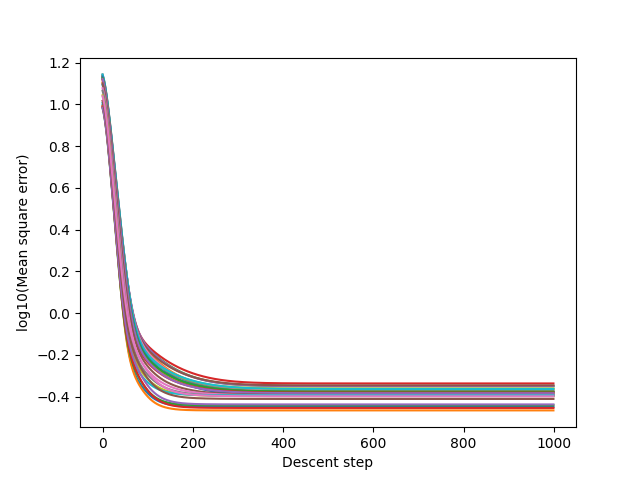

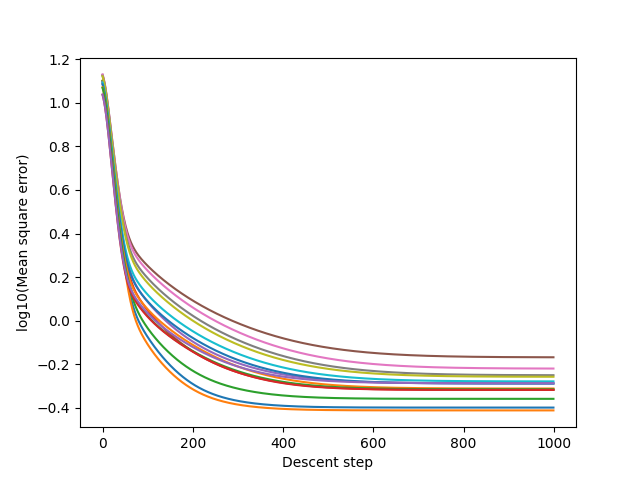

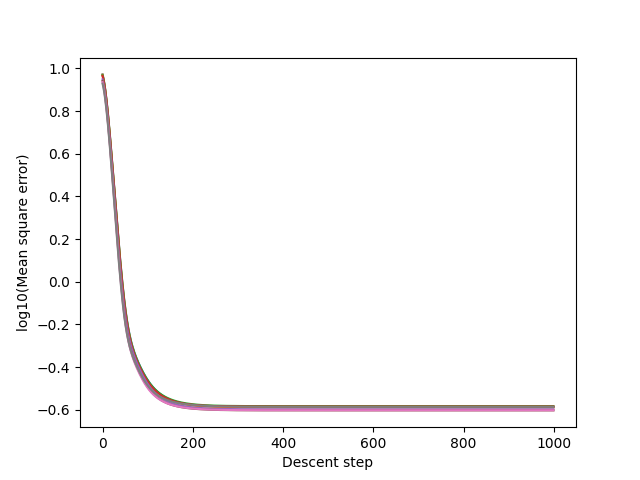

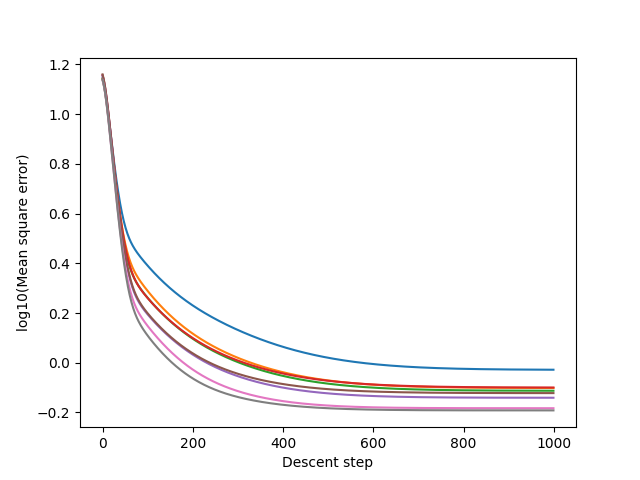

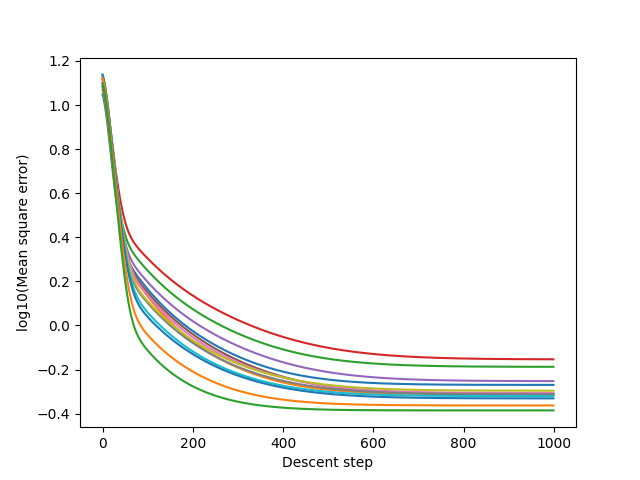

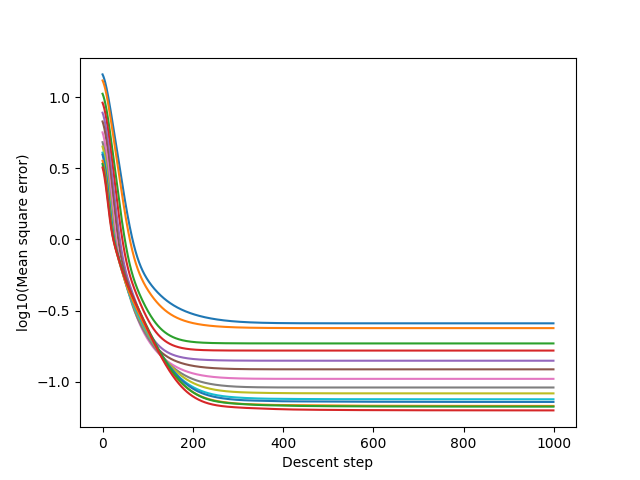

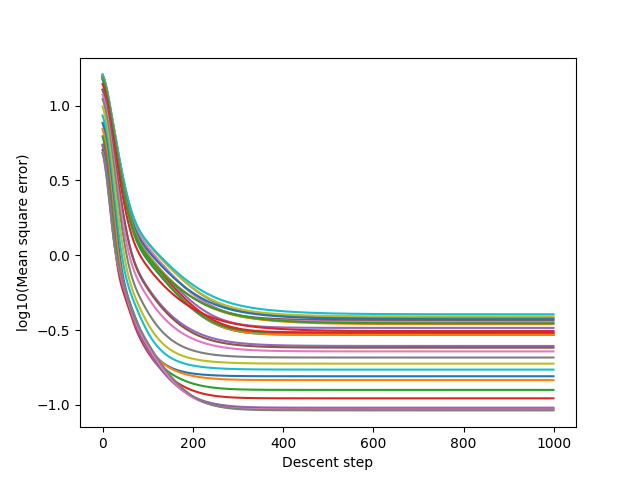

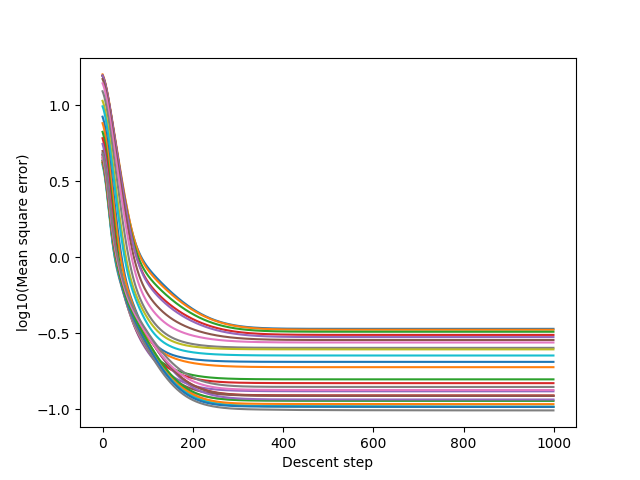

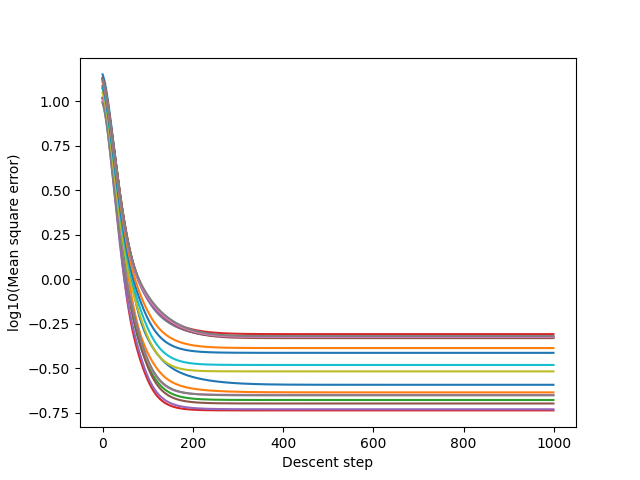

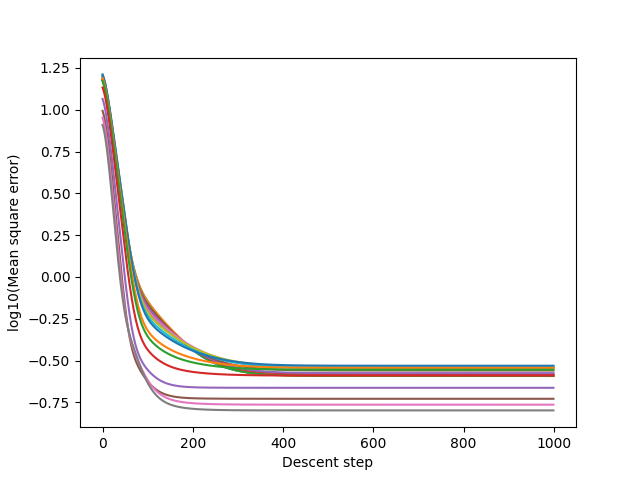

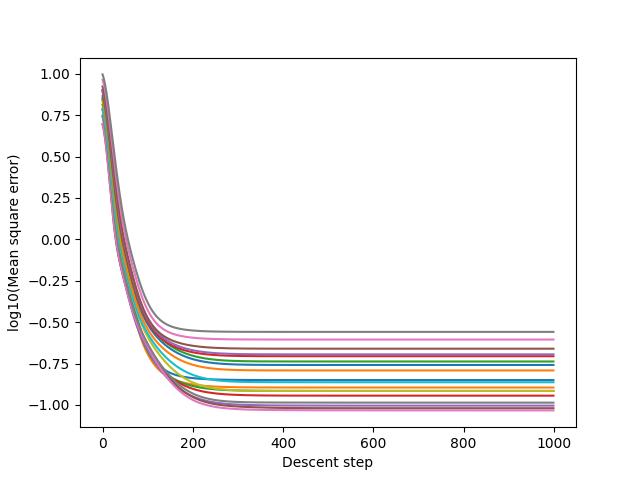

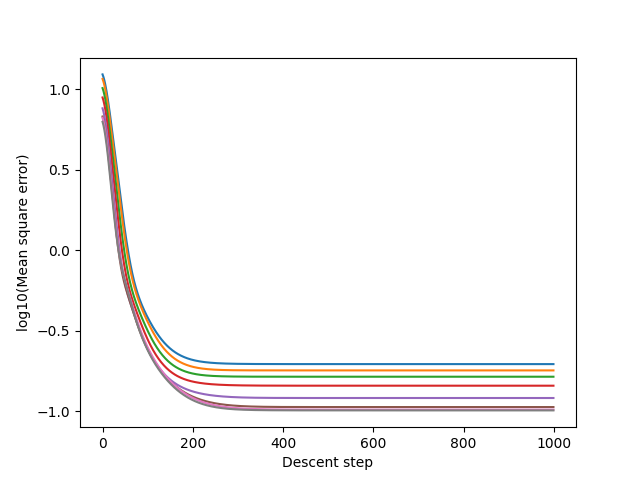

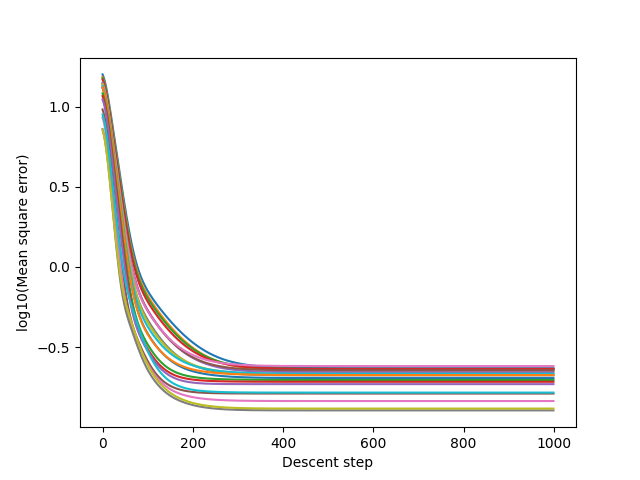

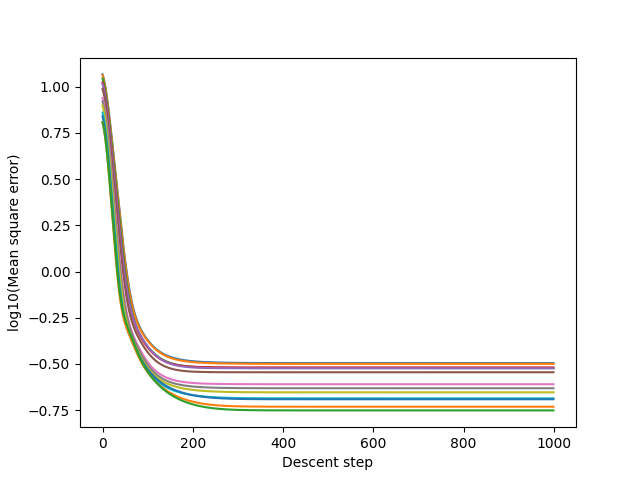

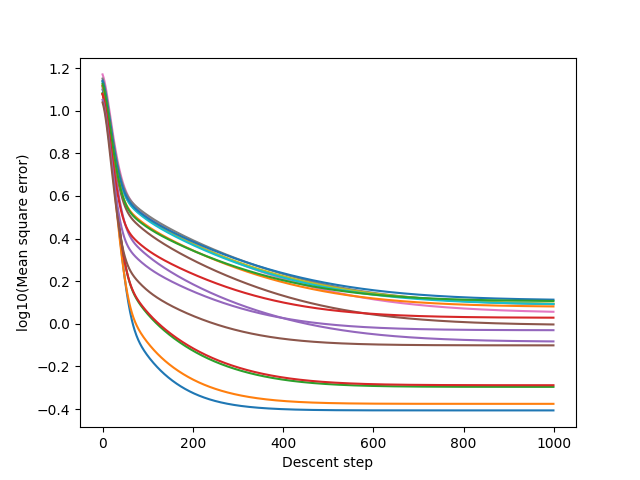

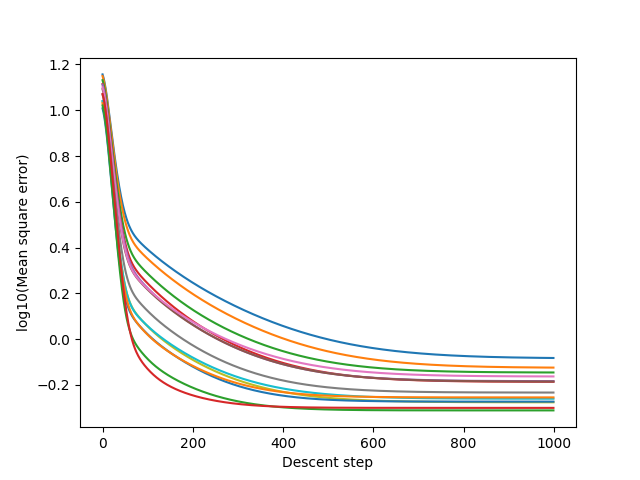

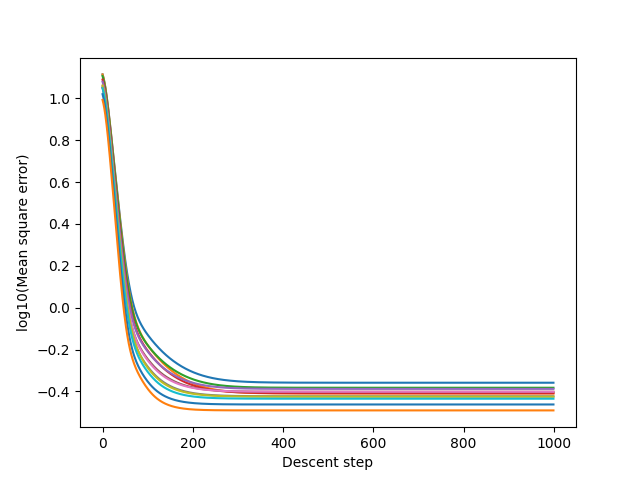

In [6]:
df = pd.read_csv("../../data/mlc4_embryos.csv")
df["Path"] = df["Path"].apply(lambda x: raw_data_path + x)
results = []
for index, row in df.iterrows():
    # print(row.Path)
    # print(row.EmbryoID)

    # Import movie
    img = load_image(row.Path + "/af_corrected.tif")
    roi = [np.loadtxt(row.Path + "/ROI_fit_%s.txt" % i) for i in range(img.shape[0])]

    # Run quantification
    iq = ImageQuant2(img=img, roi=roi, cytbg=cytbg, membg=membg)
    iq.quantify(descent_steps=1000)
    iq.plot_losses(log=True)

    # Compile results
    res = iq.compile_res(extra_columns={"Frame": np.arange(iq.nimgs)})
    res["EmbryoID"] = row.EmbryoID
    res["Membrane signal"] *= calibration_factor
    res = res.astype({"Frame": int})
    results.append(res)

### Combine dataframes

In [7]:
results_full = pd.concat(results)
results_full.to_csv("../../data/mlc4_quantification.csv")

### Filter out polar body

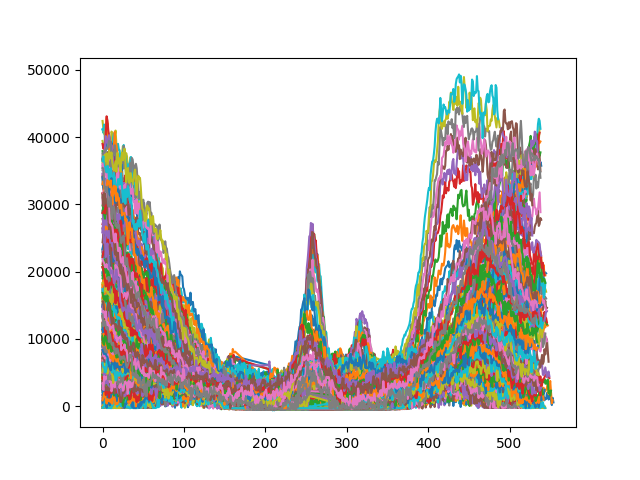

In [8]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]


fig, ax = plt.subplots()
results_full = pd.read_csv("../../data/mlc4_quantification.csv")
res_grouped = results_full.groupby(["EmbryoID", "Frame"])
for i, (g, r) in enumerate(res_grouped):
    path = df[df.EmbryoID == g[0]]["Path"].values[0]
    roi = np.loadtxt(path + "/ROI_fit_%s.txt" % g[1])
    _mems = r["Membrane signal"]
    mems = _mems.to_numpy()
    if os.path.exists(path + "/polar_body.txt"):
        polar_body = np.loadtxt(path + "/polar_body.txt")
        ind = int(
            mems.shape[0]
            * np.argmin(np.linalg.norm(roi - polar_body, axis=1))
            / roi.shape[0]
        )
        mems[ind - 20 : ind + 20] = np.nan
        nans, x = nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])
    ax.plot(mems)
    results_full.loc[_mems.index, "Membrane signal"] = mems
results_full.to_csv("../../data/mlc4_quantification_no_pb.csv")